In [28]:

# ppl_plots = {}
# for k in ['Llama3-8B', 'Llama2-7B', 'Llama2-13B', 'Llama3.2-3B']:
#     save_path = f'./bit_plot_data/{k}.json'
#     with open(save_path, 'r') as f:
#         data = json.load(f)
#     ppl_plots[k] = data

# Read PPL

In [94]:
def cal_mse_from_json(result):
    sum_mse = 0
    total_n = 0
    for k,v in result.items():
        if not k.endswith('.pt'): continue
        sum_mse += v['mse'] * v['num_pixels']
        total_n += v['num_pixels']
        # print(k, v['mse'])
    return sum_mse / total_n

def cal_proxy_loss_from_json(result):
    sum = 0
    total_n = 0
    for k,v in result.items():
        if not k.endswith('.pt'): continue
        sum += v['proxy_err']
        total_n += 1
    return sum / total_n

In [16]:

# PPL
import glob
import json
import re
path_list = [
    # '/workspace/Weight_compression/hf_model_comp_results/quip-sharp/llama3_8b_/ft1'
    # '/workspace/Weight_compression/hf_model_comp_results/awq/meta-llama--Meta-Llama-3-8B'
    # '/workspace/Weight_compression/hf_model_comp_results/quip-sharp/llama3_8b/ft1'
    # '/workspace/Weight_compression/hf_model_comp_results/quip-sharp/llama2_7b/ft1',
    # '/workspace/Weight_compression/hf_model_comp_results/quip-sharp/llama2_13b/ft1',
    # '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Meta-Llama-3-8B/ql_gaussian_rnorm'
    # '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Meta-Llama-3-8B/uniform_ql_rnorm/ql2',
    # "/workspace/Weight_compression/hf_model_comp_results/qtip/llama2_7b/ft1"
    # '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Llama-2-13b-hf/uniform_ql_rnorm/ql0',
    # '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Llama-2-13b-hf/uniform_ql_rnorm/ql1',
    # '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Llama-2-7b-hf/uniform_ql_rnorm/ql2',
    # '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Llama-2-7b-hf/uniform_ql_rnorm/ql3',
    # '/workspace/Weight_compression/hf_model_comp_results_sv3/llama3.2_1b_inst/ft1'
    '/workspace/Weight_compression/hf_model_comp_results_sv3/meta-llama--Llama-3.2-3B-Instruct/ql_ldlq128_rnorm_ft'
]
for path in path_list:
    print('/'.join(path.split('/')[-2:]))
    listdir = glob.glob(f'{path}/*.json')
    # listdir = [l for l in listdir if 'ppl' in l]
    listdir = [l for l in listdir if 'zeroshot' not in l]
    print(listdir[:1])
    c4ppl = []
    wikippl = []
    ptbppl = []
    bits = []
    bpp = []
    mse, proxy_err = [], []
    for file in listdir:        
        with open(file, 'r') as f:
            results = json.load(f)            
            try:
                bpp.append(results['bpp_loss'])
                # bpp.append(results['bpp'])
            except:
                # bit = re.search(r'w(\d+)', file.lower()).group(1) 
                # bit = re.search(r'qtip-(\d+)', file.lower()).group(1)
                # bit = re.search(r'8b_(\d+)', file.lower()).group(1)
                # bit = re.search(r'8b_(\d+)', file.lower()).group(1)
                bit = re.search(r'(\d+)\s*bit', file.lower()).group(1)
                bits.append(int(bit))
            
            try:
                if 'ppl' in results.keys(): wikippl.append(results['ppl']['wikitext2'])
                else: wikippl.append(results['wikitext2'])
            except:
                pass
            try:
                if 'ppl' in results.keys(): c4ppl.append(results['ppl']['c4'])
                else: c4ppl.append(results['c4'])
            except:
                pass
            try:
                if 'ppl' in results.keys(): ptbppl.append(results['ppl']['ptb'])
                else: ptbppl.append(results['ptb'])
            except:
                pass
            
            # mse.append(cal_mse_from_json(results))
            # proxy_err.append(cal_proxy_loss_from_json(results))
            
    if bpp != []:
        sorted_indices = sorted(range(len(bpp)), key=lambda i: bpp[i])
        bpp = [bpp[i] for i in sorted_indices]
    elif bits != []:
        sorted_indices = sorted(range(len(bits)), key=lambda i: bits[i])
        bits = [bits[i] for i in sorted_indices]
        
    if wikippl != []:
        wikippl = [wikippl[i] for i in sorted_indices]
    if c4ppl != []:
        c4ppl = [c4ppl[i] for i in sorted_indices]
    if mse != []:
        mse = [mse[i] for i in sorted_indices]
    if proxy_err != []:
        proxy_err = [proxy_err[i] for i in sorted_indices]
    # if ptbppl != []:
    #     ptbppl = [ptbppl[i] for i in sorted_indices]
    print("'bpp' : ", bits, ',')
    print("    'bpp' : ", bpp, ',')
    print("    'ppl_wikitext2' : ", wikippl, ',')
    print("    'ppl_c4' : ", c4ppl, ',')
    print("    'ppl_ptb' : ", ptbppl, ',')
    print("    'mse' : ", mse, ',')
    print("    'proxy_err' : ", proxy_err, ',')



meta-llama--Llama-3.2-3B-Instruct/ql_ldlq128_rnorm_ft
['/workspace/Weight_compression/hf_model_comp_results_sv3/meta-llama--Llama-3.2-3B-Instruct/ql_ldlq128_rnorm_ft/lmbda100_result.json']
'bpp' :  [] ,
    'bpp' :  [1.4866547492288409, 2.305583594633, 2.6720943528981436, 3.169662787445954, 3.957077749428295, 4.780493611735957, 5.985442032416661, 6.351901960514841] ,
    'ppl_wikitext2' :  [120.48391723632812, 15.528154373168945, 13.242801666259766, 11.934012413024902, 11.256174087524414, 11.17859172821045, 11.089018821716309, 11.065159797668457] ,
    'ppl_c4' :  [172.3354949951172, 18.706497192382812, 16.28917694091797, 15.300298690795898, 14.724664688110352, 14.574065208435059, 14.50007438659668, 14.495681762695312] ,
    'ppl_ptb' :  [] ,
    'mse' :  [] ,
    'proxy_err' :  [] ,


# Read Zeroshot

In [17]:
import glob
import json
import re
path_list_zeroshot = [
    # '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Meta-Llama-3-8B/ql_ldlq128_rnorm'
    # '/workspace/Weight_compression/hf_model_comp_results/qtip/llama3_8b/noft'
    # '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Llama-2-7b-hf/scaleH_rnorm_ldlq128_scale_cond(col_std)/(7B_trained)size128_encdim1024_M256'
    # '/workspace/Weight_compression/hf_model_comp_results/spinquant/8B'
]
if len(path_list_zeroshot):
    path_list = path_list_zeroshot

tasks = ['arc_challenge', 'arc_easy', 'boolq', 'piqa', 'winogrande', 'hellaswag', 'mmlu', 'mathqa', 'openbookqa', 'pubmedqa', 'sciq']
for path in path_list:
    print('/'.join(path.split('/')[-2:]))
    zeroshot_files = [f for f in glob.glob(f'{path}/*.json') if 'zeroshot' in f]
    print(zeroshot_files[-1])
    zeroshot_results = {}
    for file in zeroshot_files:
        with open(file, 'r') as f:
            results = json.load(f)
            
        m_lambda = re.search(r'lmbda(\d+)', file)
        if m_lambda:
            key = int(m_lambda.group(1))
        else:
            m_bit = re.search(r'(\d+)\s*bit', file.lower())
            if m_bit:
                key = int(m_bit.group(1))
            else:
                bit = re.search(r'w(\d+)', file.lower())
                key = int(bit.group(1))
            
        # key = 0

        if key not in zeroshot_results:
            zeroshot_results[key] = {}
        for task in tasks:
            try:
                # task_accs = {task: results['results'][task]['acc,none'] for task in tasks}
                try:
                    r = results['results'][task]['acc,none']
                except:
                    r = results['results'][task]['acc']
                zeroshot_results[key][task] = r
            except:
                pass

    tasksets = {
        'zeroshot': ['arc_challenge', 'arc_easy', 'boolq', 'piqa', 'winogrande'], ## zeroshot
        'commonsense': ['arc_challenge', 'arc_easy', 'boolq', 'piqa', 'winogrande', 'hellaswag',], ## commonsense
        'average9': ['arc_challenge', 'arc_easy', 'boolq', 'piqa', 'winogrande', 'hellaswag', 'mmlu', 'mathqa', 'openbookqa'],
        'mmlu': ['mmlu'],
    }
    for tlabel, tasks in tasksets.items():
        num_tasks = len(tasks)
        bpp_keys = []
        avg_accuracies = []
        for key in sorted(zeroshot_results.keys()):
            
            accuracies_for_this_key = []
            for task in tasks:
                if task in zeroshot_results[key]:
                    accuracies_for_this_key.append(zeroshot_results[key][task])
                    
            if len(accuracies_for_this_key) == num_tasks:
                average = sum(accuracies_for_this_key) / num_tasks
                bpp_keys.append(key)
                avg_accuracies.append(average)

        print("'bpp' : ", bpp_keys, ',')
        print(f"    '{tlabel}' : ", avg_accuracies, ',')

meta-llama--Llama-3.2-3B-Instruct/ql_ldlq128_rnorm_ft
/workspace/Weight_compression/hf_model_comp_results_sv3/meta-llama--Llama-3.2-3B-Instruct/ql_ldlq128_rnorm_ft/lmbda300_common_mmlu_zeroshot_results0.4.4.json
'bpp' :  [10, 30, 50, 100, 300, 1000, 10000, 100000] ,
    'zeroshot' :  [0.4368539142130647, 0.6232290005586896, 0.6538257912801265, 0.6753461790153663, 0.6699210356479502, 0.6763778275651682, 0.679878997688522, 0.6785184661918424] ,
'bpp' :  [10, 30, 50, 100, 300, 1000, 10000, 100000] ,
    'commonsense' :  [0.41219270783771456, 0.5941268027293999, 0.6257318094034249, 0.6466529185481236, 0.6444057491848169, 0.6505166753310611, 0.6534509140599597, 0.6525494952448451] ,
'bpp' :  [] ,
    'average9' :  [] ,
'bpp' :  [10, 30, 50, 100, 300, 1000, 10000, 100000] ,
    'mmlu' :  [0.24690215069078478, 0.47308075772681957, 0.5319042871385843, 0.5828941746190002, 0.5939324882495371, 0.6040450078336419, 0.6025494943740208, 0.6051132317333713] ,


In [119]:
zeroshot_results

{3: {}}

'bpp' :  [100] ,
'zeroshot' :  [0.7247428955461601] ,
'bpp' :  [100] ,
'commonsense' :  [0.7032852151857648] ,

'bpp' :  [100] ,
'zeroshot' :  [0.72350621191611] ,
'bpp' :  [100] ,
'commonsense' :  [0.7022380485346194] ,

# Plot

/tmp/ipykernel_3404056/4222301234.py:158: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10')


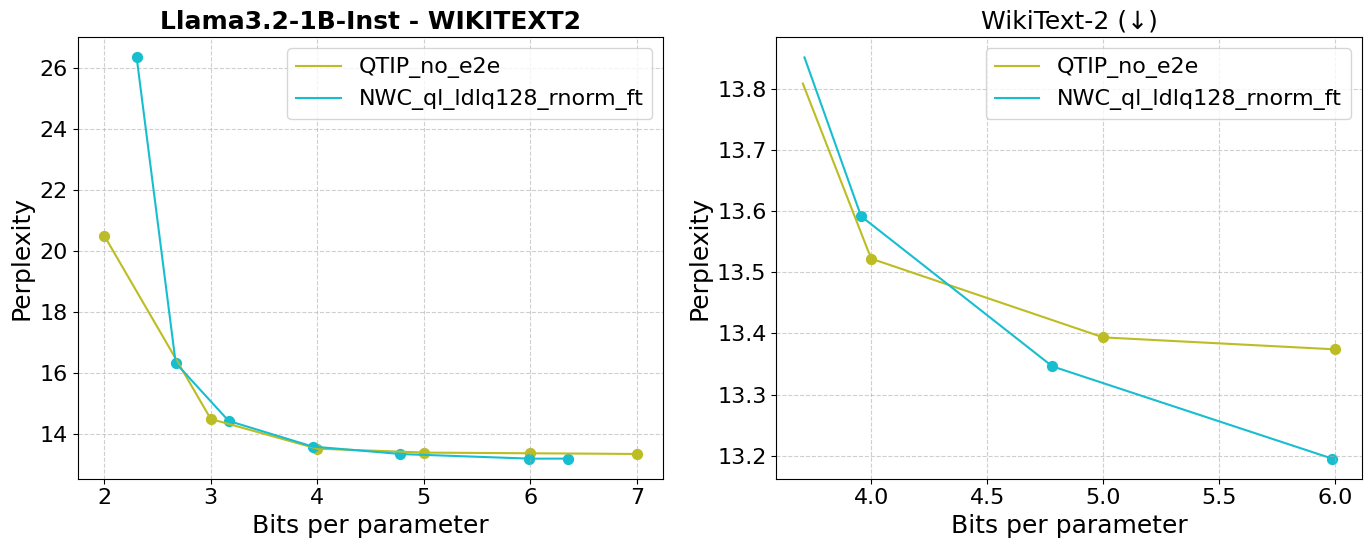

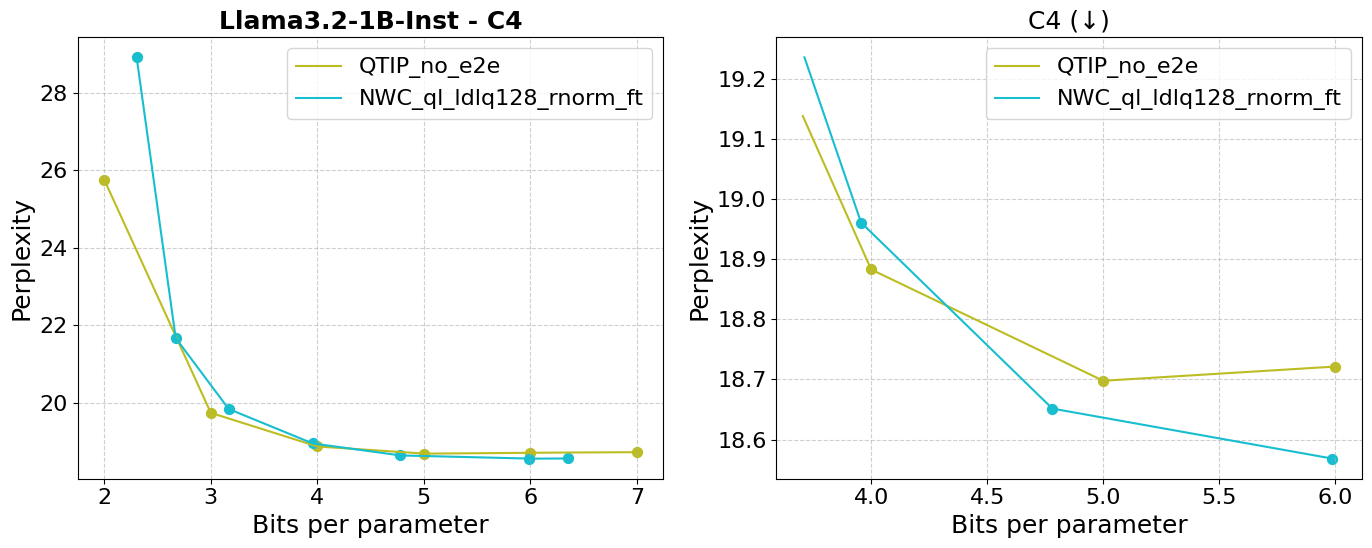

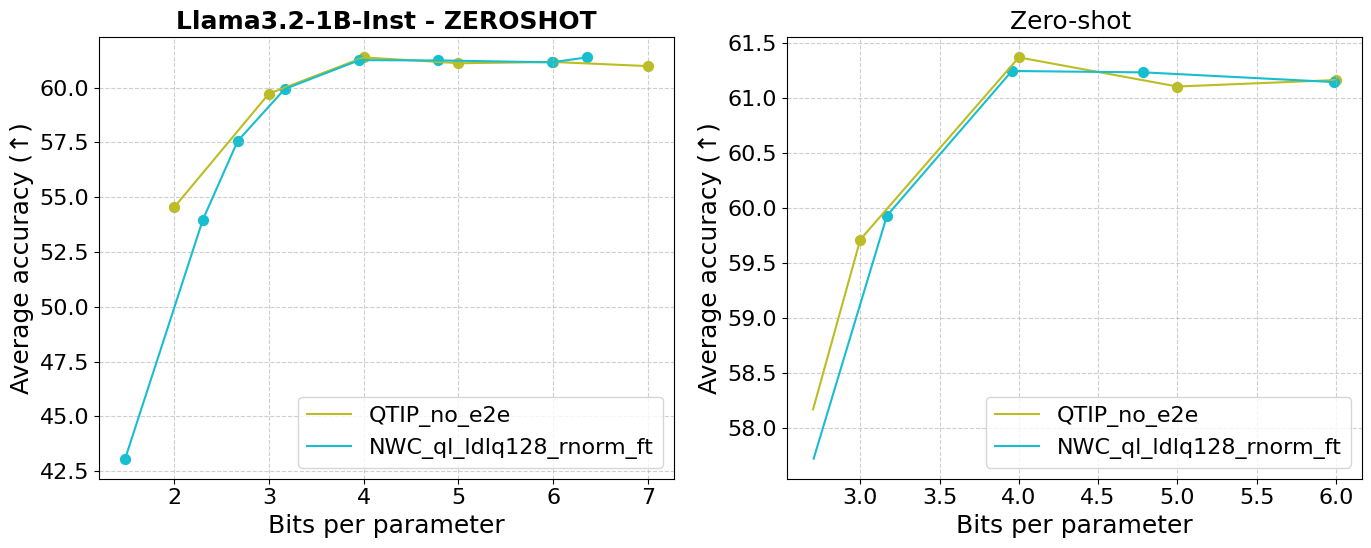

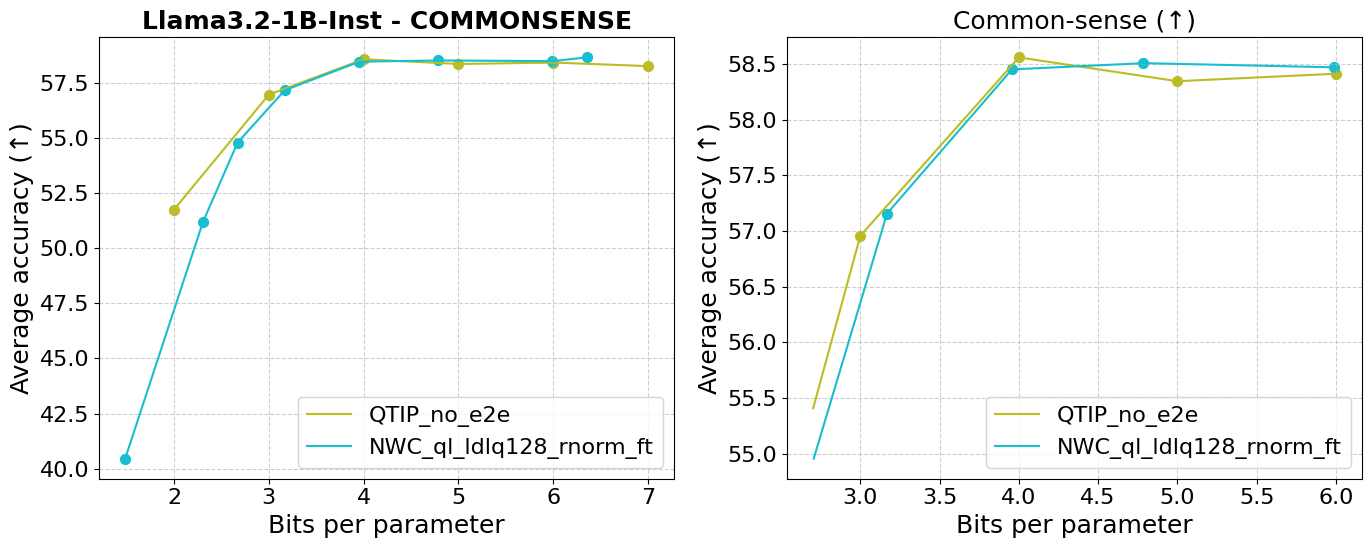

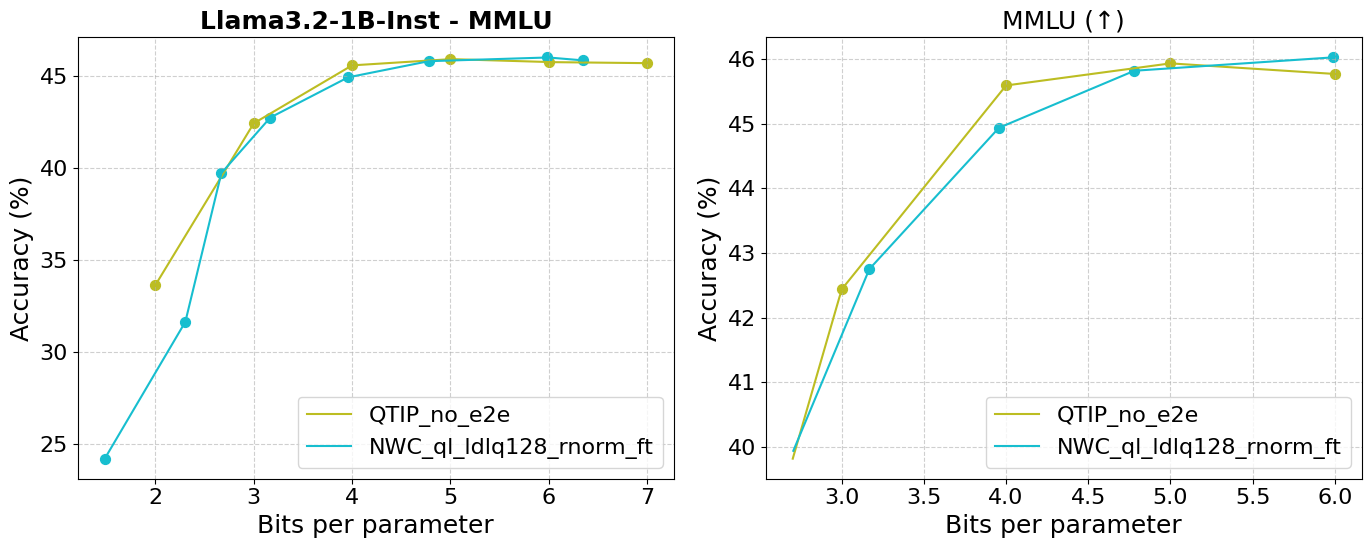

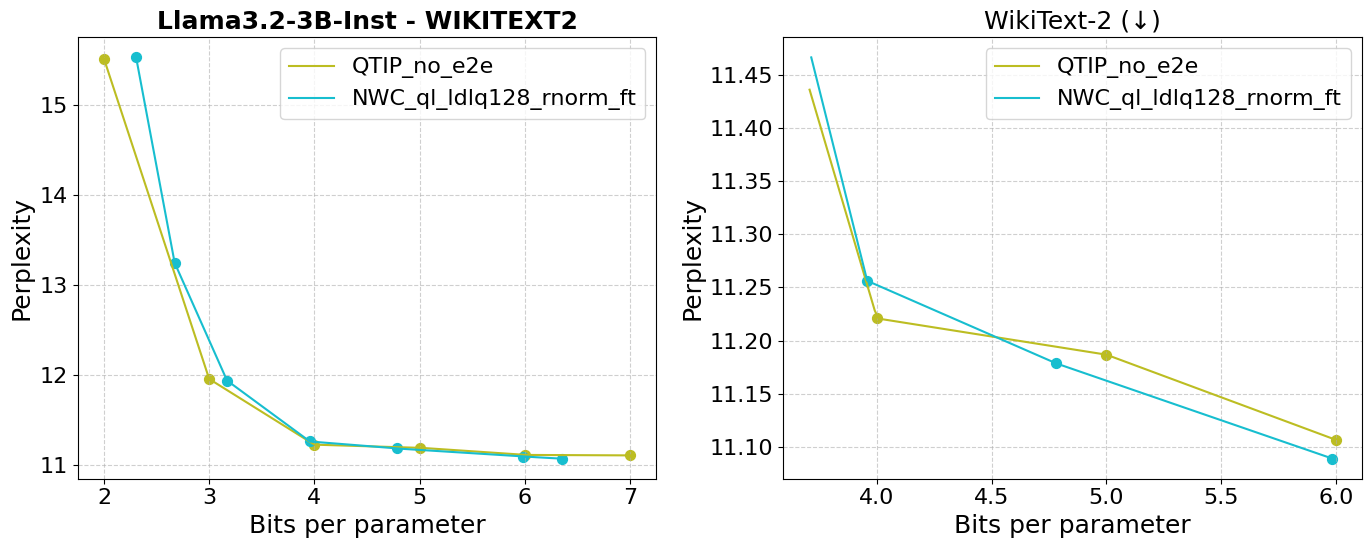

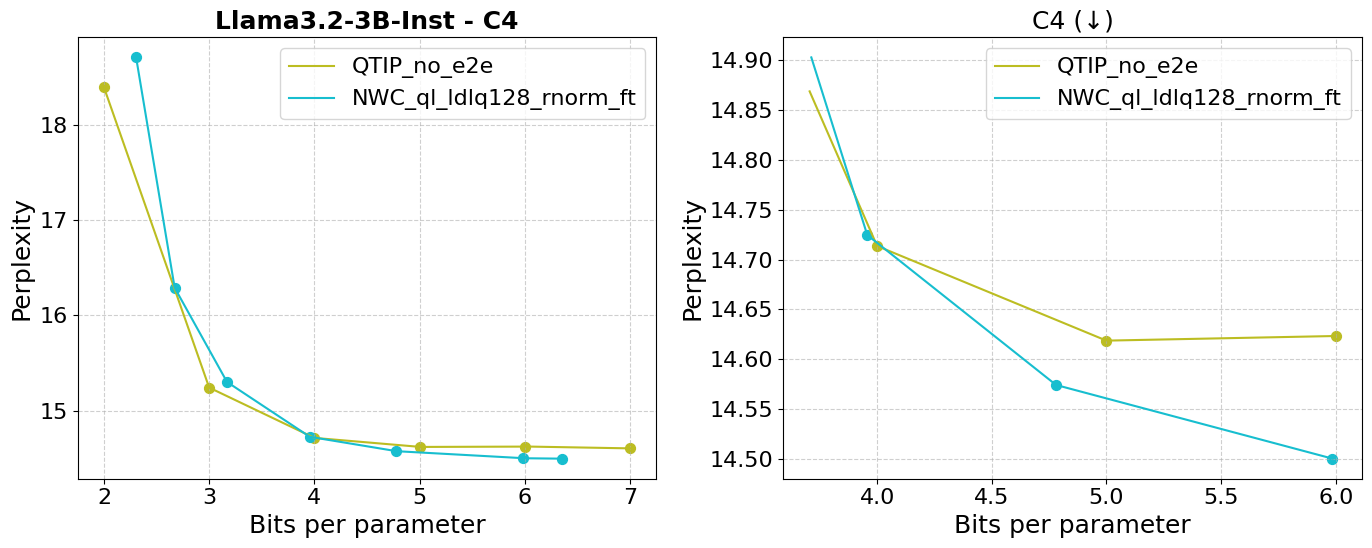

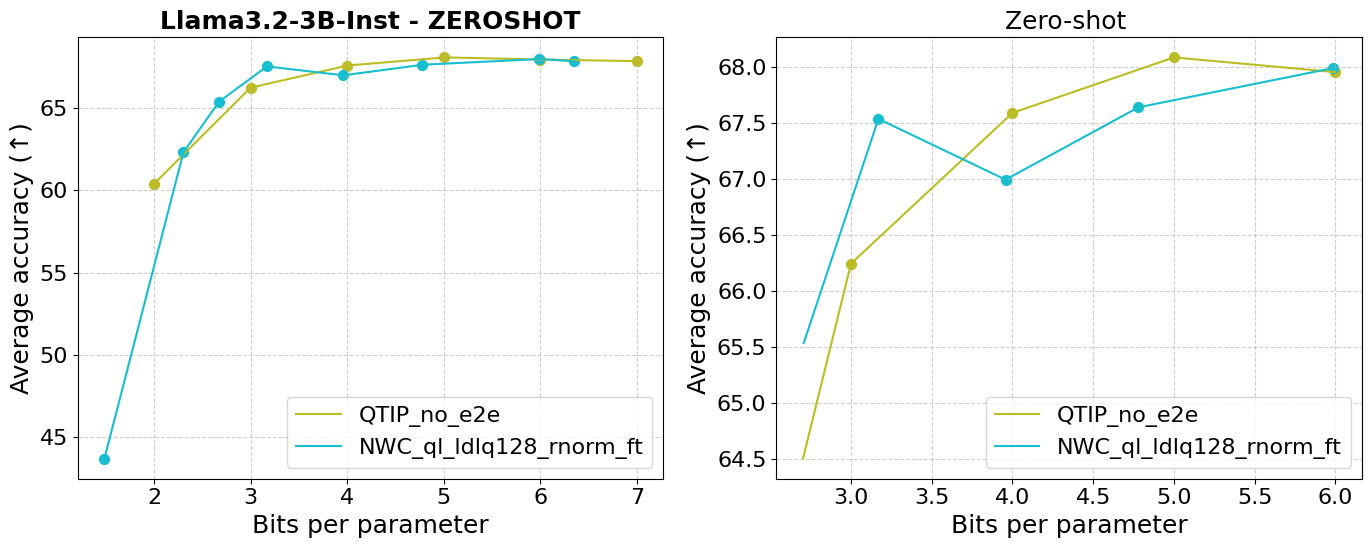

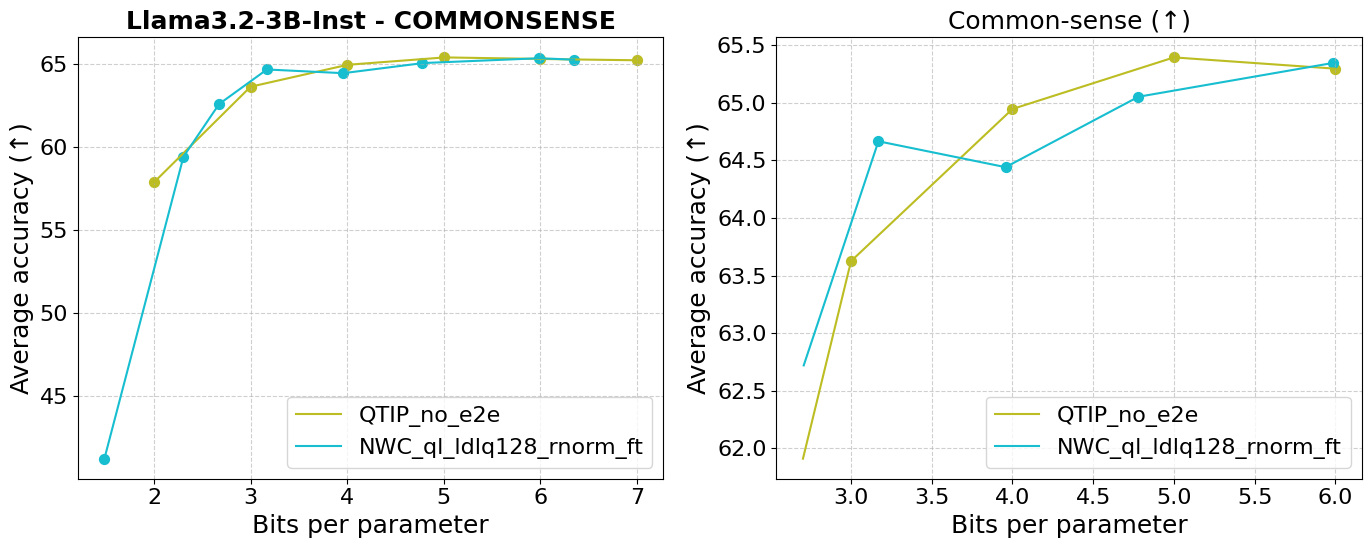

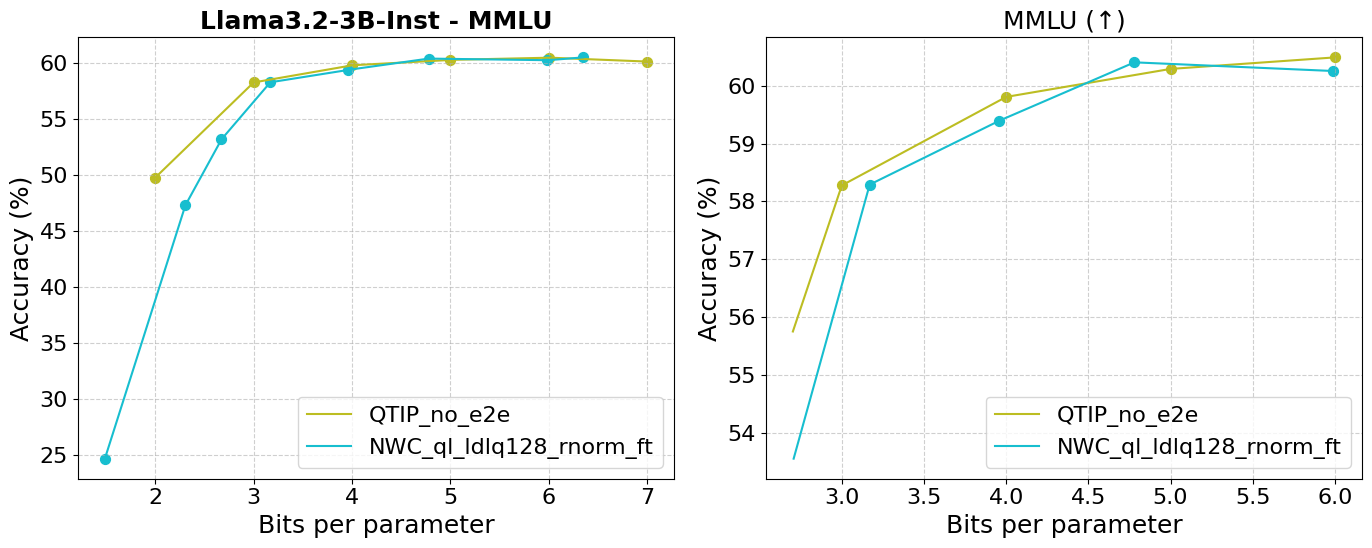

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import matplotlib.cm as cm
#################################################################
##                      PLOT CONFIGURATION                     ##
#################################################################
plot_name = [
    # 'RTNg128',
    # 'SeedLM',
    # 'GPTQ',
    # 'AWQ',
    # 'OMNIQ',
    # 'AQLM',
    # 'SpinQ',
    # 'QUIP#',
    # 'QuIP#_no_e2e',
    'QTIP_no_e2e',
    # 'QTIP_no_ft',
    # # 'jpeg128',
    # # 'webp128',
    'NWC_ql_ldlq128_rnorm_ft',
    # 'NWC_ql_ldlq128_rnorm_ft_ft',
    # 'scaleH_scale_cond_ldlq128_uniform31.6_ft_scaleh_rnorm',
    # 'scaleH_scale_cond_ldlq128_ft',
    # 'scaleH_scale_cond_ldlq128_ft_skip1down',
    # 'NWC_ql_ldlq128_rnorm_ft(7b_droplast)',
    # 'NWC_ql_ldlq128_rnorm',
    # 'scaleH_scale_cond_ldlq128',
    # 'ql_scale_cond_scaleH_rnorm_ldlq',
    # 'scaleH_scale_cond_ldlq128_v2',
    # 'scaleH_scale_cond_ldlq128_v2_pe',
    # 'scaleH_scale_cond_ldlq128_aug_scale_p1_M4',
    # 'scaleH_scale_cond_ldlq128_aug_scale_p2_M2',
    # 'scaleH_scale_cond_ldlq128(7b_trained)',
    # 'scaleH_scale_cond_ldlq128(8b_trained)',
    # 'scaleH_scale_cond_ldlq128_aug_scale_p1_M2',
    # 'scaleH_scale_cond_ldlq128_aug_scale_p1_M4',
    # 'scaleH_scale_cond_ldlq128_aug_scale_p2_M2',
    # 'scaleH_scale_cond_ldlq128_aug_scale_p2_M4',
    # 'scaleH_scale_cond_ldlq128_lb1',
    # 'scaleH_scale_cond_uniform31_ldlq128',
    # 'scaleH_scale_cond_ldlq128_16_24_ltc',
    # 'scaleH_scale_cond_ldlq128_M144',
    # 'scaleH_scale_cond_ldlq128_ft_scaleh_rnorm',
    # 'scaleH_scale_cond_ldlq128_ft',
    # 'scaleH_scale_cond_uniform31_ldlq128',
    # 'NWC_ql_ltc_ldlq128_rnorm',
    # 'NWC_ql_ldlq128_rnorm_M32',
    # 'NWC_ql_ldlq128_rnorm_ft_ft',
    # 'ql',
    # 'ql_rnorm',
    # 'ql_gaussian_rnorm',
    # 'uniform_ql0_rnorm',
    # 'uniform_ql1_rnorm',
    # 'uniform_ql2_rnorm',
    # 'uniform_ql3_rnorm',
    # 'ql_rnorm_trained',
    # 'ql_cnorm',
    # 'ql_cnorm_trained',
    # 'ql_lnorm',
    # 'ql_lnorm_trained',
    # 'ql_ldlq128_rnorm',
    # 'ql_compand_ldlq128_rnorm',
    # 'ql_compand_ldlq128_rnorm(trained_rnormed)',
    # 'ql_compand_ldlq128_rnorm_fix_s',
]
plot_labels = [
    # 'SeedLM',
    # 'GPTQ',
    # 'AWQ',
    # 'SpinQ',
    # r'QuIP#$^⁎$',
    # r'QTIP$^⁎$',
    # 'NWC (Ours)',
    # 'NWC data-free (Ours)',
    # 'Weight Trained',
    # 'Gaussian Trained',
]
# plot_labels = [
#     # 'RTN',
#     # 'SeedLM',
#     # 'GPTQ',
#     # 'AWQ',
#     # 'OMNIQ',
#     # 'AQLM',
#     # 'SpinQ',
#     # 'QUIP#',
#     # 'QTIP_no_ft',
#     # 'QTIP_no_e2e',
#     # 'NWC(Ours)',
#     # 'NWC(8B_trained)',
#     # 'NWC(7B_trained)',
#     # 'QTIP_no_ft',
#     # 'NWC_QL',
#     # 'NWC_ltc',
#     # 'QL',
#     # 'NWC_no_ft',
#     # 'NWC_scaleW(7B_trained)',
#     # 'NWC_scaleW(8B_trained)',
#     # 'QL',
#     # 'ScaleW',
#     # 'ScaleW_P.1_M4',
#     # 'ScaleW_P.2_M2',
#     # 'ScaleW_P.2_M4',
#     # 'Weight trained',
#     # 'Gaussian trained',
# ]

plot_keys = [
    ('ppl_wikitext2', 'WikiText-2 (↓)'),
    ('ppl_c4', 'C4 (↓)'),
    ('zeroshot','Zero-shot '), 
    ('commonsense', 'Common-sense (↑)'),
    ('mmlu', 'MMLU (↑)'),
    # ('mse', 'MSE')
    # 'proxy_err',
    ]
models = [
    # 'Llama3-8B',
    # 'Llama2-7B',
    # 'Llama3.2-3B',
    # 'Llama2-13B',
    'Llama3.2-1B-Inst',
    'Llama3.2-3B-Inst',
    ]


# PPL_ZOOM_RANGE = (3.5, 6) ## eval
PPL_ZOOM_RANGE = (3.7, 6) 
# PPL_ZOOM_RANGE = (2.5, 6.1) ## gaussian
# PPL_ZOOM_RANGE = (3, 5.2) ## seedlm
# ZEROSHOT_ZOOM_RANGE = (3.5, 6.0) ## eval
# PPL_ZOOM_RANGE = (2.5, 5.5)
ZEROSHOT_ZOOM_RANGE = (3.25, 5.7) # 13B
ZEROSHOT_ZOOM_RANGE = (2.7, 6) # 8B
MSE_ZOOM_RANGE = (3.5, 7)
SPLINE_ORDER = 1
plt.rcParams['font.size'] = 16
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.titlesize'] = 20
#################################################################
##                      HELPER FUNCTION                        ##
#################################################################
def replace_none_with_nan(data):
    """None 값을 np.nan으로 변환하여 계산에 용이하게 합니다."""
    return np.array([np.nan if val is None else val for val in data])
#################################################################
##                         MAIN SCRIPT                         ##
#################################################################
if not plot_labels or len(plot_labels) != len(plot_name):
    plot_labels = plot_name

cmap = cm.get_cmap('tab10')
# cmap = cm.get_cmap('tab20')
colors = {}
idx = 8  # 0은 'Our' 전용
for name in plot_labels:
    if 'Ours' in name:          # 필요하면 name.lower().find('our') >= 0 로
        colors[name] = cmap(0)
    else:
        colors[name] = cmap(idx)
        idx += 1
        
# colors['Weight Trained'] = cmap(0)
# colors['Gaussian Trained'] = cmap(3)

for m_name in models:
    if m_name not in ppl_plots:
        print(f"Skipping model {m_name}: No data found.")
        continue
    
    plots_data = ppl_plots[m_name]
    for plot_key in plot_keys:
        plot_key, key_label = plot_key
        
        if 'ppl' in plot_key:
            zoom_range = PPL_ZOOM_RANGE 
        if plot_key in ['commonsense', 'zeroshot']: 
            zoom_range = ZEROSHOT_ZOOM_RANGE
        # zoom_range = MSE_ZOOM_RANGE if plot_key == 'mse' else ZEROSHOT_ZOOM_RANGE
        
        fig, axs = plt.subplots(1, 2, figsize=(14, 6))
        # fig, axs = plt.subplots(1, 2, figsize=(20, 7))
        
        for k, label in zip(plot_name, plot_labels):
            try:
                v = plots_data[k]
                
                bpp = replace_none_with_nan(v['bpp'])
                metric = replace_none_with_nan(v[plot_key])

                mask = np.isfinite(bpp) & np.isfinite(metric) & (metric < 50)
                if plot_key in ['commonsense', 'zeroshot', 'mmlu']:
                    metric = metric * 100
                # mask = np.isfinite(bpp) & np.isfinite(metric)
                # if np.count_nonzero(mask) <= SPLINE_ORDER:
                #     continue
                
                sort_indices = np.argsort(bpp[mask])
                bpp_sorted = bpp[mask][sort_indices]
                metric_sorted = metric[mask][sort_indices]
                
                x_smooth = np.linspace(bpp_sorted.min(), bpp_sorted.max(), 300)
                spline = make_interp_spline(bpp_sorted, metric_sorted, k=SPLINE_ORDER)
                y_smooth = spline(x_smooth)
                
                marker = 's' if 'Our' in label else 'o'
                marker_size = 100 if marker == 's' else 50
                lw = 2.5 if marker == 's' else 1.5
                # marker = 'o'
                # marker_size = 75
                # linestyle = '-.' if 'jpeg' in k or 'webp' in k else '-'
                linestyle = '-.' if 'gaussian' in k else '-'
                # linestyle = '-'
                color = colors[label]
                
                axs[0].plot(x_smooth, y_smooth, linestyle=linestyle, color=color, label=label, alpha=1, lw=lw)
                axs[0].scatter(bpp_sorted, metric_sorted, color=color, marker=marker, s=marker_size, alpha=1)
                # axs[0].set_xscale('log')
                # if 'wiki' in plot_key:
                #     axs[0].set_xlim(1.9,8)
                # elif 'c4' in plot_key:
                #     axs[0].set_ylim(8.7,13)
                # else:
                #     axs[0].set_xlim(2,6)
                
                zoom_data_mask = (bpp_sorted >= zoom_range[0]) & (bpp_sorted <= zoom_range[1])
                zoom_smooth_mask = (x_smooth >= zoom_range[0]) & (x_smooth <= zoom_range[1])

                if np.any(zoom_data_mask):
                    axs[1].plot(x_smooth[zoom_smooth_mask], y_smooth[zoom_smooth_mask], linestyle=linestyle, color=color, label=label, alpha=1, lw=lw)
                    axs[1].scatter(bpp_sorted[zoom_data_mask], metric_sorted[zoom_data_mask], color=color, marker=marker, s=marker_size, alpha=1)
                if '8B' in m_name and 'wiki' in plot_key:
                    # axs[1].set_ylim(6.12, 6.8)
                    # axs[0].set_ylim(6,11)
                    pass
                if '8B' in m_name and 'c4' in plot_key:
                    axs[1].set_ylim(8.87, 9.4)
                    axs[0].set_ylim(8.8, 15)
                if '8B' in m_name and 'commonsense' in plot_key:
                    axs[1].set_ylim(68.5, 71)
                if '8B' in m_name and 'mmlu' in plot_key:
                    axs[1].set_ylim(57, 62.3)
                    
                    
                if '2-7B' in m_name and 'wiki' in plot_key:
                    # axs[1].set_ylim(5.4, 5.75)
                    pass
                if '2-7B' in m_name and 'c4' in plot_key:
                    axs[1].set_ylim(6.97, 7.3)
                if '2-7B' in m_name and 'commonsense' in plot_key:
                    axs[1].set_ylim(0.65, 0.67)
                if '2-7B' in m_name and 'mmlu' in plot_key:
                    axs[1].set_ylim(0.4, 0.44)
                if '13B' in m_name and 'wiki' in plot_key:
                    # axs[1].set_ylim(4.8, 5.2)
                    pass
                if '13B' in m_name and 'c4' in plot_key:
                    axs[1].set_ylim(6.46, 6.7)
                if '13B' in m_name and 'zeroshot' in plot_key:
                    axs[1].set_ylim(0.7, 0.72)

            except KeyError:
                print(f"Warning: Data for '{k}' not found in '{m_name}'. Skipping.")
            except Exception as e:
                print(f"An error occurred while plotting '{k}' for '{m_name}': {e}")

        # if 'ppl' in plot_key:
        #     y_label = 'Perplexity (↓)'
        # if plot_key in ['commonsense', 'zeroshot']: 
        #     y_label = 'Accuracy (↑)'
        # if plot_key in ['mmlu']: 
        #     y_label = 'Accuracy (↑)'

        if 'ppl' in plot_key:
            y_label = 'Perplexity'
        if plot_key in ['commonsense', 'zeroshot']: 
            y_label = 'Average accuracy (↑)'
        if plot_key in ['mmlu']: 
            y_label = 'Accuracy (%)'

        
        for i, ax in enumerate(axs):
            try:
                fp16_val = plots_data['FP16'][plot_key]
                if plot_key in ['commonsense', 'zeroshot', 'mmlu']:
                    fp16_val = fp16_val * 100
                ax.axhline(y=fp16_val, color='purple', linestyle='--', label='Baseline')
            except KeyError:
                pass
            
            # ax.set_xlabel('Bits Per Weight (bpp)')
            ax.set_xlabel('Bits per parameter')
            ax.set_ylabel(y_label)
            ax.grid(True, which='both', linestyle='--', alpha=0.6)
            ax.legend()
        
        # axs[0].set_title('Full Bit-rate Range')
        axs[0].set_title(f'{m_name} - {plot_key.replace("ppl_", "").upper()}', weight='bold')
        # axs[1].set_title(f'{plot_key.replace("ppl_", "").upper()}')
        axs[1].set_title(key_label)
        # axs[0].set_title(key_label)
        # axs[0].set_title(f'{m_name}')
        # axs[1].set_title(f'Zoomed Range: {zoom_range[0]} to {zoom_range[1]} bpp')
        
        # 1. 두 번째 그래프의 범례(legend) 제거
        # axs[1].get_legend().remove()
        # 2. 두 번째 그래프의 테두리(spines) 제거
        # for spine in axs[1].spines.values():
        #     spine.set_visible(False)            
        # 3. 두 번째 그래프의 축 눈금 숫자(tick labels)도 제거하여 더 깔끔하게 만들기
        # axs[1].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

        # fig.suptitle(f'{m_name} - {plot_key.replace("ppl_", "").upper()}', weight='bold')
        
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

# Llama3 8B

In [1]:
import os
import glob
import json
ppl_plots = {}
save_dir = './bit_plot_data'
for k in glob.glob(f'{save_dir}/*.json'):
    with open(k, 'r') as f:
        data = json.load(f)
    k = k.split('/')[-1].split('.json')[0]
    print(k)
    ppl_plots[k] = data

Llama3.2-3B
Llama2-7B
Llama3-8B
Llama3.2-3B-Inst
Llama3.2-1B-Inst
Llama2-13B
Vicuna_7B


In [2]:
## llama3-8
import numpy as np

plots = ppl_plots['Llama3-8B']

plots['NWC_ql_ldlq128_rnorm_ft'] = {}
plots['NWC_ql_ldlq128_rnorm_ft']['bpp'] =  [2.3015328621482833, 2.6693616848877775, 3.16721133423002, 3.954826640797994, 4.77782450354873, 5.9810235201596065]
plots['NWC_ql_ldlq128_rnorm_ft']['ppl_wikitext2'] =  [8.403983116149902, 7.251631259918213, 6.6762261390686035, 6.31689453125, 6.193994998931885, 6.15234375]
plots['NWC_ql_ldlq128_rnorm_ft']['ppl_c4'] =  [11.731051445007324, 10.42491340637207, 9.59599781036377, 9.087160110473633, 8.944413185119629, 8.895471572875977]
plots['NWC_ql_ldlq128_rnorm_ft']['zeroshot'] =  [0.6837428048045503, 0.711155642760884, 0.7220614639150719, 0.7316054281153441, 0.7312745842563112, 0.7300477303109602]
plots['NWC_ql_ldlq128_rnorm_ft']['mmlu'] =  [0.4967241133741632, 0.5519868964534966, 0.6019085600341831, 0.6187864976499075, 0.6198547215496368, 0.6214926648625552]
plots['NWC_ql_ldlq128_rnorm_ft']['mathqa'] =  [0.32663316582914576, 0.36214405360134005, 0.3798994974874372, 0.3916247906197655, None, None]
plots['NWC_ql_ldlq128_rnorm_ft']['openbookqa'] =  [0.272, 0.318, 0.342, 0.344, None, None]
plots['NWC_ql_ldlq128_rnorm_ft']['pubmedqa'] =  [0.728, 0.714, 0.702, 0.732, None, None]
plots['NWC_ql_ldlq128_rnorm_ft']['sciq'] =   [0.957, 0.962, 0.963, 0.967, None, None]
plots['NWC_ql_ldlq128_rnorm_ft']['hellaswag'] =   [0.5258912567217686, 0.5609440350527783, 0.5844453296156145, 0.5956980681139216, None, None]
plots['NWC_ql_ldlq128_rnorm_ft']['commonsense'] = [0.65743421345742, 0.6861203748095331, 0.699125441531829, 0.7089542014484403, 0.7091930039751276, 0.708718325348757]
plots['NWC_ql_ldlq128_rnorm_ft']['average'] = [0.6113602327225299, 0.6386230180829123, 0.6530509733375086, 0.6642851360873013, None, None]
plots['NWC_ql_ldlq128_rnorm_ft']['average9'] = [0.5599958399942033, 0.5943170221013373, 0.613173411856955, 0.623126277440035, None, None]

plots['NWC_ql_ldlq128_rnorm_ft_ft'] = {
    'bpp' :  [2.305022174926797, 2.6728544805619796, 3.1707150148487506, 3.9583340753899674, 4.781334869017323, 5.984535099150469] ,
    'ppl_wikitext2' :  [8.168700218200684, 7.210991382598877, 6.66185188293457, 6.309615612030029, 6.191755771636963, 6.153031349182129] ,
    'ppl_c4' :  [11.44295883178711, 10.354386329650879, 9.563471794128418, 9.090902328491211, 8.945050239562988, 8.897656440734863] ,
    'ppl_ptb' :  [12.680496215820312, 11.684524536132812, 11.089338302612305, 10.768906593322754, 10.632280349731445, None] ,
    'zeroshot' :  [0.6894486781013016, 0.7082950868499187, 0.7247358201724443, 0.7310260870702469, 0.7292107220010309, 0.7310764847714101] ,
    'mmlu' :  [0.5100413046574562, 0.5646631533969521, 0.6031192137872098, 0.6185728528699616, 0.6182167782367184, 0.6217063096425011] ,
    'mathqa' :  [0.33936348408710215, 0.3591289782244556, 0.38760469011725296, 0.39798994974874374, 0.4, 0.40033500837520936] ,
    'openbookqa' :  [0.282, 0.318, 0.328, 0.344, 0.342, 0.346] ,
    'pubmedqa' :  [0.722, 0.734, 0.724, 0.738, 0.748, 0.75] ,
    'sciq' :  [0.961, 0.962, 0.96, 0.968, 0.96, 0.962] ,
    'hellaswag' :  [0.5412268472415853, 0.5676160127464649, 0.5856403106950807, 0.5955984863572994, 0.599183429595698, 0.6008763194582752] ,
    'commonsense' :  [0.6647450396246822, 0.6848485744993432, 0.7015532352595505, 0.7084548202847557, 0.7075395066001421, 0.7093764572192209] ,
    'average' :  [0.6184431842266047, 0.6406257798743151, 0.655640301405615, 0.6652083385752036, 0.6648594379852337, 0.6669363692120941] ,
    'average9' :  [0.568875002943628, 0.5945426198463851, 0.6142270350513073, 0.6234768582585821, 0.6228282019819523, 0.6249222290370039] ,
}
plots['QTIP_no_e2e']['mse'] = [0.0003382987252175204, 0.0003506669495261751, 0.000331561615413333, 6.185517426123747e-07, 6.18494123215941e-07, None]
plots['QTIP_no_ft']['mse'] = [0.00033819362344572184, 0.0003512482951770415, 0.0003323069680093865, 6.215465816899596e-07, 6.214888037280576e-07, None]
# plots['QTIP_no_ft'] = {
#     'mse' :  [0.0010134968315819255, 0.0010724005524725027, 0.0009820092864174512, 0.0008923357568514453, None, None] ,
# }
# plots['SpinQ'] = {}
# plots['SpinQ']['bpp'] = [4, 5, 6, 7, 8, 9]
# plots['SpinQ']['zeroshot'] = [0.715325472636504, 0.7306027344648212, 0.7315773049339473, 0.7287862681657514, 0.7290385141834816, 0.7296742732998392]
# plots['SpinQ']['ppl_wikitext2'] = [6.4, 6.253126621246338, 6.177572250366211, 6.154661178588867, 6.148306846618652, 6.147614479064941]
# plots['SpinQ']['ppl_c4'] = [None, 9.079610824584961, 8.951584815979004, 8.915331840515137, 8.902764320373535, 8.901545524597168] # 4bit ??
plots['AWQ'] = {
    'bpp' :  [2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25, 9.25] ,
    'ppl_wikitext2' :  [1705084.0, 8.222607612609863, 6.530762672424316, 6.238217830657959, 6.157261848449707, 6.14137601852417, 6.138271331787109, 6.135891437530518] ,
    'ppl_c4' :  [2105256.75, 11.567950248718262, 9.396510124206543, 8.995973587036133, 8.906269073486328, 8.887651443481445, 8.881821632385254, 8.881292343139648] ,
    'zeroshot' :  [0.4181112129682186, 0.6967598813567112, 0.7234130858684871, 0.7298931522879416, 0.7268199977535291, 0.7275232348388868, 0.7282946139046595, 0.7278560248829934] ,
    'commonsense' :  [0.39109679351945587, 0.672845941096071, 0.7014301772797041, 0.7079256319520937, 0.7058127877448831, 0.706481803446533, 0.7072076041318621, None] ,
    'mmlu' :  [0.24654607605754167, 0.5108958837772397, 0.604614727246831, 0.6163651901438542, 0.6216350947158524, 0.6217063096425011, 0.6207093006694203, None] ,
}
# plots['AWQ']['commonsense'] = [0.7014301772797041, 0.7079256319520937, 0.7058127877448831, 0.706481803446533, 0.7072076041318621, None]
# plots['AWQ']['mmlu'] = [0.604614727246831, 0.6163651901438542, 0.6216350947158524, 0.6217063096425011, 0.6207093006694203, None]

plots['SpinQ'] = {
    'bpp' :  [4, 5, 6, 7, 8, 9] ,
    'ppl_wikitext2': [6.502776145935059, 6.253126621246338, 6.177572250366211, 6.154661178588867, 6.148306846618652, 6.147614479064941],
    'ppl_c4': [9.570544242858887, 9.079610824584961, 8.951584815979004, 8.915331840515137, 8.902764320373535, 8.901545524597168], # 4bit ??
    'zeroshot' :  [0.715325472636504, 0.7306027344648212, 0.7315773049339473, 0.7287862681657514, 0.7290385141834816, 0.7296742732998392] ,
    # 'commonsense' :  [None, 0.7091974257697449, None, 0.7076837038538534, 0.7078939088686287, None] ,
    # 'mmlu' :  [None,  0.6202107961828799, None,  0.6202107961828799, 0.6202107961828799, None] ,
    'commonsense' :  [0.6945577239108888, 0.7088322926621302, 0.7096776286386094, 0.7076837038538534, 0.7077113423148212, None] ,
    'mmlu' :  [0.5972083748753739, 0.6115937900583962, 0.6185728528699616, 0.6210653753026635, 0.6188577125765561, None] ,
}
plots['QuIP#_no_e2e'] = {
    'bpp' :  [2, 3, 4] ,
    'ppl_wikitext2' :  [9.312065124511719, 6.989524841308594, 6.423613548278809] ,
    'ppl_c4' :  [12.773486137390137, 10.022749900817871, 9.242640495300293] ,
    'zeroshot' :  [0.6597419769612316, 0.7125861995086145, 0.7213374078294685] ,
    'commonsense' :  [0.6341307286600186, 0.6894535132000188, 0.6999162060532035] ,
    'mmlu' :  [0.4362626406494801, 0.5753453923942459, 0.6113089303518018] ,
}
# plots['QuIP#_no_e2e'] = {
#     'bpp' :  [2, 3, 4] ,
#     'ppl_wikitext2' :  [9.295530319213867, 7.002470970153809, 6.427237510681152] ,
#     'ppl_c4' :  [12.750805854797363, 10.031511306762695, 9.241280555725098] ,
#     'zeroshot' :  [0.6502430494855609, 0.7077936250034416, 0.7250565970300075] ,
#     'commonsense' :  [0.6260489861692561, 0.6852107467208192, 0.7033640665351636] ,
#     'mmlu' :  [0.42344395385272754, 0.5888762284574847, 0.6108104258652614] ,
# }

plots['scaleH_scale_cond_ldlq128_ft_scaleh_rnorm']={
    'bpp' :  [2.5816884556641946] ,
    'ppl_wikitext2' :  [7.378907680511475] ,
    'ppl_c4' :  [10.515342712402344] ,
}
plots['scaleH_scale_cond_ldlq128_uniform31.6_ft_scaleh_rnorm'] = {
    'bpp' :  [3.2385716435427847, 3.736826651944564, 4.526172189471813, 5.3875273153758965] ,
    'ppl_wikitext2' :  [6.644343852996826, 6.378746032714844, 6.228664875030518, 6.1709885597229] ,
    'ppl_c4' :  [9.501782417297363, 9.168744087219238, 8.975276947021484, 8.911539077758789] ,
    'zeroshot' :  [0.7210807787193744, 0.7279040339306653, 0.7310159064688625, 0.7292839216765028] ,
    'commonsense' :  [0.6991048579217253, 0.7059360941322894, 0.7096081236108608, 0.7079822363967537] ,
    'mmlu' :  [0.5959265061956986, 0.6118786497649907, 0.6160803304372596, 0.6207093006694203] ,
}
plots['NWC_ql_ldlq128_rnorm_ft(7b_droplast)'] = {
    'bpp' :  [2.6768291098280597, 3.1753246284161625, 4.786085133369152, 5.975892701687721] ,
    'ppl_wikitext2' :  [7.2637038230896, 6.641744613647461, 6.193701267242432, 6.147362232208252] ,
    'ppl_c4' :  [10.375536918640137, 9.562775611877441, 8.95553207397461, 8.89659595489502] ,
    'zeroshot' :  [0.7009721717555117, 0.7198034046274879, 0.7309058379988537, 0.7305834019797104] ,
    'commonsense' :  [0.6783478182275152, 0.6971275467427831, 0.709234251575424, 0.7088327792173083] ,
    'average9' :  [0.5909529006720877, 0.6105448105273298, 0.6241365682769878, 0.6237087759722898] ,
    'mmlu' :  [0.5630252100840336, 0.5948582822959693, 0.6194986469163937, 0.6197122916963396] ,
}
plots['NWC_ql_ldlq128_rnorm']['mse'] = [1.19136171109565e-05, 7.178902150483369e-06, 3.6065438052081445e-06, 1.2173254132753242e-06, 3.9288072262166907e-07, 9.537573868606115e-08] 
plots['NWC_ql_ldlq128_rnorm']['zeroshot'] = [None, 0.7000360362415139, 0.720449359892838, 0.7332462614003634, 0.7278781609656866, 0.7307174880848548]
plots['NWC_ql_ldlq128_rnorm']['commonsense'] = [None, 0.6763229333414063, 0.697964588067108, 0.7100062202899862, 0.7065618147461848, 0.7092100689892544]
plots['NWC_ql_ldlq128_rnorm']['mmlu'] = [None,0.5533399800598205, 0.5986326734083464, 0.6158666856573137, 0.6183592080900157, 0.6209941603760148]
plots['NWC_ql_ldlq128_rnorm']['proxy_err'] = [None, 0.014240315684738951, 0.00711297743376755, 0.002392055803405973, 0.0007721683753183177, 0.00018868655328877333]

plots['NWC_ql_ltc_ldlq128_rnorm'] = {    
    'bpp' :  [2.1681253324047876, 2.536017006549698, 3.0276367968091598, 3.761333986973533, 4.534340518025251, 5.1857787141433125] ,
    'ppl_wikitext2' :  [9.580574035644531, 7.723183631896973, 6.852689743041992, 6.433512210845947, 6.261632442474365, 6.239041805267334] ,
    'ppl_c4' :  [13.296182632446289, 10.99604606628418, 9.87440013885498, 9.251077651977539, 9.031234741210938, 9.000214576721191] ,
}
plots['NWC_ql_ldlq128_rnorm_M32'] = {
    'bpp' :  [2.3392449223364773, 2.7127244875121574, 3.2055303133451023, 3.966097005141469, 4.839231241207856, 7.0309164850757675, 12.280436782309643, 12.556291145774034] ,
    'ppl_wikitext2' :  [9.520490646362305, 7.713614463806152, 6.778763771057129, 6.338783264160156, 6.202572822570801, 6.150820732116699, 6.142492294311523, 6.143822193145752] ,
    'ppl_c4' :  [13.031490325927734, 10.987594604492188, 9.738638877868652, 9.131049156188965, 8.955814361572266, 8.8953275680542, 8.888776779174805, 8.88879108428955] ,
}
plots['scaleH_scale_cond_ldlq128_M144'] = {
    'bpp' :  [2.8640592698580942, 3.234355380328802, 3.7323448786941857, 5.754356695195804] ,
    'ppl_wikitext2' :  [7.161091327667236, 6.764827251434326, 6.510087966918945, 6.23397159576416] ,
    'ppl_c4' :  [10.19597053527832, 9.636635780334473, 9.270816802978516, 8.964173316955566] ,
}
plots['scaleH_scale_cond_ldlq128_lb1'] = {
    'bpp' :  [2.1002917440894704, 2.5951853102216353, 2.883571780071809, 3.250968553269139, 3.7501994132135925, 4.537625389603468, 5.388680987633192] ,
    'ppl_wikitext2' :  [9.955157279968262, 7.581960678100586, 7.078410625457764, 6.702467918395996, 6.452032089233398, 6.264641284942627, 6.200242519378662] ,
    'ppl_c4' :  [13.518024444580078, 10.778346061706543, 10.099358558654785, 9.590213775634766, 9.222333908081055, 9.014293670654297, 8.944779396057129] ,
}
plots['scaleH_scale_cond_ldlq128_16_24_ltc'] = {
    'bpp' :  [2.454302328423812, 5.151623455950847] ,
    'ppl_wikitext2' :  [9.620630264282227, 6.342728137969971] ,
    'ppl_c4' :  [14.59619140625, 9.089498519897461] ,
    'mse' :  [1.2146630223487985e-05, 3.539760410855062e-07] ,
}
plots['ql'] = {
    'bpp' :  [2.24237661020687, 2.613814057209171, 3.1162333211933193, 3.909208780584427, 4.739987953064533, 5.949138035281346] ,
    'ppl_wikitext2' :  [13.6191987991333, 8.83846664428711, 7.263482093811035, 6.507265567779541, 6.292906761169434, 6.204991817474365] ,
    'ppl_c4' :  [18.175260543823242, 12.53907585144043, 10.38531494140625, 9.349654197692871, 9.037774085998535, 8.948458671569824] ,
    'mse' :  [1.0199578609943343e-05, 6.131308863425252e-06, 3.050775221506814e-06, 1.0312178187605198e-06, 3.2844221373387393e-07, 7.589643768585601e-08] ,
}
plots['ql_rnorm'] = {
    'bpp' :  [2.291885180828663, 2.6635373962613254, 3.164186853915453, 3.95374735745673, 4.777479619647448, 5.980926228830447][1:] ,
    'ppl_wikitext2' :  [10.264134407043457, 7.876493453979492, 6.8878631591796875, 6.407932281494141, 6.230624675750732, 6.190780162811279][1:] ,
    'ppl_c4' :  [14.078311920166016, 11.275914192199707, 9.911861419677734, 9.203027725219727, 8.99560260772705, 8.93327522277832][1:] ,
    'mse' :  [1.0314166750628847e-05, 6.166090026878871e-06, 3.075823331486141e-06, 1.0314794838945246e-06, 3.284118967627182e-07, 7.609669323838109e-08] ,
    'proxy_err' :  [0.035575673060520785, 0.021172264625420212, 0.010573259443909981, 0.003577873132793944, 0.0011916608134145332, 0.00031706485926211566] ,
}
plots['ql_rnorm_trained'] = {
    'bpp' :  [3.1701010528665323, 3.955074687416737] ,
    'ppl_wikitext2' :  [7.005031585693359, 6.562883377075195] ,
    'ppl_c4' :  [10.057902336120605, 9.401910781860352] ,
    'mse' :  [3.065355022565578e-06, 1.0289498000475124e-06] ,
    'proxy_err' :  [0.010597872596918023, 0.003677892064713108] ,
}
plots['ql_cnorm'] = {
    'bpp' :  [2.2898183197069626, 2.6614077531087856, 3.1622924253057976, 3.9532549431404242, 4.779643503232644, 5.982053916041668] ,
    'ppl_wikitext2' :  [10.447787284851074, 8.006245613098145, 6.925668239593506, 6.408973693847656, 6.238088607788086, 6.195812225341797] ,
    'ppl_c4' :  [14.408465385437012, 11.451031684875488, 9.955235481262207, 9.207925796508789, 8.99947452545166, 8.943400382995605] ,
    'mse' :  [1.0267608442650665e-05, 6.1477196441254245e-06, 3.0665251461533453e-06, 1.0294534090823286e-06, 3.276658294095223e-07, 7.592080455228659e-08] ,
}
plots['ql_cnorm_trained'] = {
    'bpp' :  [4.88338358184466] ,
    'ppl_wikitext2' :  [6.392029762268066] ,
    'ppl_c4' :  [9.169530868530273] ,
    'mse' :  [3.1260827535547403e-07] ,
}
plots['ql_lnorm'] = {
    'bpp' :  [2.278479813096615, 2.650080821261956, 3.1510816864096203, 3.942426025580901, 4.769574532715174, 5.9743592495528555] ,
    'ppl_wikitext2' :  [10.69096565246582, 8.073326110839844, 6.9697489738464355, 6.437781810760498, 6.253942012786865, 6.193940162658691] ,
    'ppl_c4' :  [14.884724617004395, 11.582107543945312, 10.037210464477539, 9.235445976257324, 9.011330604553223, 8.94036865234375] ,
    'mse' :  [1.0269764070258702e-05, 6.149821047826047e-06, 3.069215760551294e-06, 1.0310474808628867e-06, 3.2830988591423184e-07, 7.605745624225028e-08] ,
}
plots['ql_lnorm_trained'] = {
    'bpp' :  [4.873334992103851] ,
    'ppl_wikitext2' :  [6.359281539916992] ,
    'ppl_c4' :  [9.129611015319824] ,
    'mse' :  [3.205920523753091e-07] ,
}
plots['ql_gaussian_rnorm'] = {
    # 'bpp' :  [2.677361206509746, 3.1789037260011983, 4.785810677477946, 5.639273710548878] ,
    # 'ppl_wikitext2' :  [8.043600082397461, 7.252507209777832, 6.80925178527832, 42707.890625] ,
    # 'ppl_c4' :  [11.50064468383789, 10.396976470947266, 9.727402687072754, 37038.859375] ,
    # 'mse' :  [5.975936474009393e-06, 2.9942515527185794e-06, 3.3839934679211416e-07, None] ,
    
    'bpp' :  [2.311707368407112, 2.677361206509746, 3.1789037260011983, 3.967653952109126, 4.785810677477946, 5.639273710548878, 6.018088862299919][1:] ,
    'ppl_wikitext2' :  [11.567282676696777, 8.043600082397461, 7.252507209777832, 7.247601509094238, 6.80925178527832, 42707.890625, 6.893710613250732][1:] ,
    'ppl_c4' :  [15.55427360534668, 11.50064468383789, 10.396976470947266, 10.321109771728516, 9.727402687072754, 37038.859375, 9.819385528564453][1:] ,
    
}
plots['ql_compand_ldlq128_rnorm'] = {
    'bpp' :  [2.3156970143318176, 4.84006245749501] ,
    'ppl_wikitext2' :  [8.980916976928711, 6.222814559936523] ,
    'ppl_c4' :  [12.60341739654541, 8.978134155273438] ,
    'mse' :  [1.1892199518743933e-05, 5.023994388372225e-07] ,
}
plots['ql_compand_ldlq128_rnorm_fix_s'] = {
    'bpp' :  [2.327184605053984] ,
    'ppl_wikitext2' :  [8.995851516723633] ,
    'ppl_c4' :  [12.472987174987793] ,
    'mse' :  [1.18625375704959e-05] ,
}
plots['ql_compand_ldlq128_rnorm(trained_rnormed)'] = {
    'bpp' :  [2.313465913327841] ,
    'ppl_wikitext2' :  [9.045841217041016] ,
    'ppl_c4' :  [12.596165657043457] ,
    'mse' :  [1.249075768054826e-05] ,
}
plots['scaleH_scale_cond_ldlq128_ft_skip1down'] = {
    'bpp' :  [2.8706193895050975, 3.2384979752338294, 3.738057998599428, 4.526247419588493, 5.383218906864975] ,
    'ppl_wikitext2' :  [6.9752516746521, 6.606043338775635, 6.385972499847412, 6.223353862762451, 6.172521591186523] ,
    'ppl_c4' :  [9.964187622070312, 9.491512298583984, 9.16850757598877, 8.968546867370605, 8.913383483886719] ,
    'zeroshot' :  [0.7145804842712631, 0.7193950846722187, 0.724805995056441, 0.7260503008763948, 0.7275082809465874] ,
    'commonsense' :  [0.6914971472359444, 0.6973847706531252, 0.7030556498005693, 0.7048228375324269, 0.7062037905186243] ,
    'mmlu' :  [0.580259222333001, 0.6033328585671557, 0.6103831363053696, 0.6145136020509899, 0.621919954422447] ,
}
plots['scaleH_scale_cond_ldlq128']['zeroshot'] = [None, None, None, None, 0.7201742222935476, 0.7280698928701601, 0.7303622637247873, 0.727619226231061]
plots['scaleH_scale_cond_ldlq128']['mmlu'] = [None, None, None, None, 0.5916536105967811, 0.604614727246831, 0.6158666856573137, 0.6217775245691497]
plots['scaleH_scale_cond_ldlq128']['mse'] = [1.7332179556188537e-05, 1.1752267712840701e-05, 8.901527485577914e-06, 6.000536324097976e-06, 3.629270803542703e-06, 1.8234278973576597e-06, 6.15838004011019e-07, 1.8675667303436914e-07]
plots['scaleH_scale_cond_ldlq128']['proxy_err'] = [0.03102076481757519, 0.0207030308909972, 0.015481707049340392, 0.01035200600888077, 0.006211408902215355, 0.0031158738662010626, 0.0010527477836441384, 0.0003312628274524546]
plots['scaleH_scale_cond_ldlq128(7b_trained)'] = {
    'bpp' :  [2.374845722475304, 2.872022069990635, 3.238050907993546, 3.7377715795659103, 4.527598428898132, 5.3919279641256885] ,
    'ppl_wikitext2' :  [8.51561450958252, 7.2245893478393555, 6.791215896606445, 6.502205848693848, 6.297446250915527, 6.235872268676758] ,
    'ppl_c4' :  [11.900627136230469, 10.204815864562988, 9.677017211914062, 9.295845031738281, 9.032931327819824, 8.965066909790039] ,
    'mse' :  [1.1892058665397853e-05, 6.112341437026513e-06, 3.6982026634892518e-06, 1.8647703899664891e-06, 6.316429850699706e-07, 1.9737974542833624e-07] ,
    'zeroshot' :  [0.6808766355342565, 0.7171411308905848, 0.7167212452920123, 0.7270378786763034, 0.7267243481336901, 0.7278559415745747] ,
    'proxy_err' :  [0.020795656627472323, 0.010414563619503627, 0.006289573826117183, 0.0031862640610467808, 0.001098707496485726, 0.00039048051298453047] ,
    'commonsense' :  [0.655858990077923, 0.6942119129990085, 0.6945258867110127, 0.7046500014661289, 0.7057330797283506, 0.7068088499379174] ,
    'mmlu' :  [0.5181598062953995, 0.5776242700470019, 0.5852442671984048, 0.6036177182737502, 0.6136590229312063, 0.6192850021364478] ,
}
plots['scaleH_scale_cond_ldlq128_aug_scale_p1_M4'] = {
    'bpp' :  [3.301833867167051, 3.7913158743713913, 4.586508814532023, 6.193823127792432] ,
    'ppl_wikitext2' :  [6.662583827972412, 6.3986711502075195, 6.25778341293335, 6.183209419250488] ,
    'ppl_c4' :  [9.546674728393555, 9.188263893127441, 9.007135391235352, 8.934613227844238] ,
    'zeroshot' :  [0.7228652005875527, 0.723519161100944, 0.73206933699005, 0.7277276999036484] ,
    'commonsense' :  [0.7000607734432222, 0.7021990486436699, 0.7099880735954062, 0.7065692062033159] ,
    'mmlu' :  [0.5980629539951574, 0.6130180885913687, 0.614869676684233, 0.6191425722831505] ,
}
plots['scaleH_scale_cond_ldlq128_aug_scale_p2_M2'] = {
    'bpp' :  [3.261447873253089, 3.756681559034265, 4.5426460685065155, 5.418811872028387] ,
    'ppl_wikitext2' :  [6.678755283355713, 6.423500061035156, 6.246133804321289, 6.184275150299072] ,
    'ppl_c4' :  [9.561271667480469, 9.213360786437988, 8.993371963500977, 8.921332359313965] ,
    'mse' :  [3.4703987235382365e-06, 1.7754821512834421e-06, 5.995226195573048e-07, 1.8748776404688458e-07] ,
    'proxy_err' :  [0.006013635623276059, 0.003048252578082611, 0.0010394499278163494, 0.0003335751917136674] ,
    'zeroshot' :  [0.7212573163539597, 0.7219964174424172, 0.7285497979277071, 0.7285301182319776] ,
    'commonsense' :  [0.6990528091039687, 0.7006645442439049, 0.7070219304579131, 0.707171500305842] ,
    'mmlu' :  [0.5972795898020226, 0.6091012676256944, 0.6181455633100698, 0.6185016379433129] ,    
}
plots['scaleH_scale_cond_ldlq128_aug_scale_p2_M4'] = {
    'bpp' :  [3.3683150118360152, 3.8731108912481713, 6.596451573933546] ,
    'ppl_wikitext2' :  [6.610199451446533, 6.462123394012451, 6.186022758483887] ,
    'mse' :  [3.1600939082934494e-06, 2.0196696010994667e-06, 3.05968452783369e-07] ,
    'proxy_err' :  [0.005445707203827104, 0.0028369400065782558, 0.00043495126718491] ,
    'zeroshot' :  [0.7226391036821924, 0.7265487884931374, 0.7252534554123286] ,
    'commonsense' :  [0.7007354012461474, 0.705105468204216, 0.7044077540372604] ,
    'mmlu' :  [0.6089588377723971, 0.6066799601196411, 0.6192137872097991] ,
}
plots['scaleH_scale_cond_ldlq128_v2_pe'] = {
    'bpp' :  [2.3447409284372744, 2.551322147393456, 3.2091005746848307, 3.7053889210980673, 4.498984284698963, 5.460422305533519] ,
    'ppl_wikitext2' :  [10.973031044006348, 9.478032112121582, 7.594715595245361, 7.194960117340088, 6.998477935791016, 6.9448347091674805] ,
    'ppl_c4' :  [14.894671440124512, 12.854801177978516, 10.744976043701172, 10.236467361450195, 9.920232772827148, 9.821907043457031] ,
}
plots['scaleH_scale_cond_ldlq128_v2'] = {
    'bpp' :  [2.374082615169195, 2.580094145754209, 3.237698904883403, 3.736503962570658, 4.524914811436947, 5.434868938361223] ,
    'ppl_wikitext2' :  [8.400717735290527, 7.660361289978027, 6.7432942390441895, 6.4526591300964355, 6.264720439910889, 6.2141337394714355] ,
    'ppl_c4' :  [11.691731452941895, 10.846039772033691, 9.630058288574219, 9.234439849853516, 9.005582809448242, 8.950358390808105] ,
}
plots['ql_scale_cond_scaleH_rnorm_ldlq'] = {    
    'bpp' :  [2.080077224912552, 2.86521479802636, 3.2324726259192595, 4.524334405763791, 5.380173851664249, 6.745138031645463] ,
    'ppl_wikitext2' :  [11.693158149719238, 7.355387210845947, 6.7625956535339355, 6.286227703094482, 6.2076520919799805, 6.174437999725342] ,
    'ppl_c4' :  [14.785523414611816, 10.44111442565918, 9.706792831420898, 9.043457984924316, 8.947102546691895, 8.916563034057617] ,
    'ppl_ptb' :  [] ,
    'mse' :  [1.749501800154882e-05, 6.7633903812865e-06, 4.094917873300229e-06, 1.011916826571407e-06, 3.673599646147885e-07, 1.3092897433752117e-07] ,
    'proxy_err' :  [0.031024643919019063, 0.010370581778261112, 0.0062219294202025465, 0.0010534904263457584, 0.0003308647281577188, 7.295566915388463e-05] ,
}

plots['uniform_ql0_rnorm'] = {
    'bpp' :  [2.158274119791503, 2.530061707903559, 3.032560429464166, 3.8259581073832054, 4.6635753612678785, 5.904546473748409, 6.290223121643066] ,
    'ppl_wikitext2' :  [14.829813003540039, 8.774763107299805, 7.300605297088623, 6.628237724304199, 6.296040058135986, 6.166773796081543, 6.164838790893555] ,
    'ppl_c4' :  [19.528873443603516, 12.378929138183594, 10.433653831481934, 9.470830917358398, 9.057125091552734, 8.915921211242676, 8.915803909301758] ,
}
plots['uniform_ql1_rnorm'] = {
    'bpp' :  [2.63781911922762, 3.004372580550038, 3.502678175098621, 4.285856784966129, 5.105869916482614, 6.170509386521119, 6.401246357422608] ,
    'ppl_wikitext2' :  [8.385383605957031, 7.372531414031982, 6.775069236755371, 6.404228687286377, 6.219299793243408, 6.155166149139404, 6.158701419830322] ,
    'ppl_c4' :  [11.846969604492188, 10.540349960327148, 9.694951057434082, 9.190658569335938, 8.974045753479004, 8.909514427185059, 8.902277946472168] ,
}
plots['uniform_ql2_rnorm'] ={
    'bpp' :  [5.009368084944212, 5.384553722464121, 5.852004191909845, 6.392424840193528, 6.414240805002359, 6.576791627189288] ,
    'ppl_wikitext2' :  [6.5664520263671875, 6.412943363189697, 6.289726734161377, 6.157599449157715, 6.1896162033081055, 6.186446666717529] ,
    'ppl_c4' :  [9.38457202911377, 9.207050323486328, 9.038107872009277, 8.911300659179688, 8.942237854003906, 8.939000129699707] ,
}
plots['uniform_ql3_rnorm'] ={
    'bpp' :  [6.091357163081948, 6.283482224035722, 6.316535038157151, 6.441968945786357, 6.822007679308836, 6.832673619859493, 7.089986016830573] ,
    'ppl_wikitext2' :  [6.380714416503906, 6.174943923950195, 6.168900966644287, 6.304718017578125, 6.179440021514893, 6.226238250732422, 6.183391094207764] ,
    'ppl_c4' :  [9.177294731140137, 8.924566268920898, 8.910731315612793, 9.058552742004395, 8.923283576965332, 8.987916946411133, 8.935113906860352] ,
}
plots['FP16'] = {}
plots['FP16']['ppl_wikitext2'] = 6.135671615600586
plots['FP16']['ppl_c4'] = 8.88062572479248
# plots['FP16']['zeroshot'] = 0.7614012372
plots['FP16']['zeroshot'] = 0.7290239504254532
plots['FP16']['mmlu'] =0.6217775245691497
plots['FP16']['hellaswag'] =0.6016729735112527
plots['FP16']['mathqa'] =0.4067001675041876
plots['FP16']['openbookqa'] =0.348
plots['FP16']['pubmedqa'] =0.748
plots['FP16']['sciq'] =0.964
plots['FP16']['commonsense'] = 0.7077987876064199
plots['FP16']['average9'] = 0.6248078241902062

ppl_plots['Llama3-8B'] = plots

# Llama2 7B

In [3]:
## Llama2-7B
plots = ppl_plots['Llama2-7B']

plots['QTIP_no_e2e'] = {    
    'bpp' : [2,3,4,5,6],
    'ppl_wikitext2' :  [6.461970806121826, 5.6742753982543945, 5.523437023162842, 5.501456260681152, 5.503762245178223] ,
    'ppl_c4' :  [8.08186149597168, 7.1819682121276855, 7.030472755432129, 7.002780437469482, 7.003785610198975] ,
    'ppl_ptb' :  [27.784330368041992, 23.202486038208008, 22.63103675842285, None, None] ,
    'zeroshot' :  [0.6533030162971514, 0.6788861443396528, 0.6864813721135878, 0.6860351425762545, 0.6858081957080469] ,
    'mmlu' :  [0.3439680957128614, 0.4099843327161373, 0.4138299387551631, 0.4244409628258083, 0.42515311209229456] ,
    'mathqa' :  [0.2613065326633166, 0.2834170854271357, 0.28375209380234506, 0.28241206030150756, 0.28509212730318256] ,
    'openbookqa' :  [0.276, 0.324, 0.324, 0.308, 0.308] ,
    'pubmedqa' :  [0.718, 0.72, 0.73, 0.718, 0.722] ,
    'sciq' :  [0.927, 0.938, 0.94, 0.938, 0.937] ,
    # 'hellaswag' :  [0.5200159330810595, 0.5595498904600678, 0.5675164309898426, 0.5701055566620196, 0.569308902609042] ,
    # 'commonsense' :  [0.6310885024278027, 0.6589967686930552, 0.666653881926297, 0.666713544923882, None] ,
    # 'commonsense' :  [0.6310885024278027, 0.6589967686930552, 0.666653881926297, 0.666713544923882, 0.6663916468582127] ,
    # 'average':  [0.5738914220857267, 0.6026710936637821, 0.6083186658286628, None, None] ,
    # 'average9' :  [0.5186450714381103, 0.5523757811446227, 0.5579450360128101, 0.5572371436300675, 0.5573994578383059] ,
    'zeroshot' :  [0.6533030162971514, 0.6788861443396528, 0.6864813721135878, 0.6860351425762545, 0.6858081957080469] ,
    'commonsense' :  [0.6310885024278027, 0.6589967686930552, 0.666653881926297, 0.666713544923882, 0.6663916468582127] ,
    'average9' :  [0.5186450714381103, 0.5523757811446227, 0.5579450360128101, 0.5572371436300675, 0.5573994578383059] ,
    'mmlu' :  [0.3439680957128614, 0.4099843327161373, 0.4138299387551631, 0.4244409628258083, 0.42515311209229456] ,
}
plots['SpinQ'] = {
    'bpp' :  [4, 5, 6, 7, 8] ,
    'ppl_wikitext2' :  [5.562678813934326, 5.497453212738037, 5.475654125213623, 5.4801249504089355, 5.473416328430176] ,
    'ppl_c4' :  [7.192139625549316, 7.038158893585205, 6.998880863189697, 6.987483978271484, 6.984557151794434] ,
    'zeroshot' :  [0.673483740032562, 0.6817917026849271, 0.6875201891998131, 0.6882071530701321, 0.6898526065356699] ,
    'commonsense' :  [0.6546275407793092, 0.6630943602172573, 0.6681834412089659, 0.6689052837358318, 0.6703926736731725] ,
    'mmlu' :  [0.41368750890186584, 0.4095570431562455, 0.41347386412191994, 0.4069220908702464, 0.40784788491667856] ,
}    
plots['QuIP#_no_e2e'] = {
    'bpp' :  [2, 3, 4] ,
    'ppl_wikitext2' :  [6.8262104988098145, 5.7964701652526855, 5.566837787628174] ,
    'ppl_c4' :  [8.49487590789795, 7.327883243560791, 7.075014114379883] ,
}
plots['NWC_ql_ldlq128_rnorm_ft(7b_droplast)'] = {
    'bpp' :  [2.6828457592682518, 3.1795315828965736, 4.788103508825746, 5.976961966005632] ,
    'ppl_wikitext2' :  [5.941234588623047, 5.668846130371094, 5.486321926116943, 5.474431991577148] ,
    'ppl_c4' :  [7.491902828216553, 7.182732582092285, 6.992631912231445, 6.977411270141602] ,
    'zeroshot' :  [0.6747149267482608, 0.6805173300103489, 0.6873221102432729, 0.6863341504717746] ,
    'commonsense' :  [0.6526992709292667, 0.6606216414362945, 0.667935390614664, 0.6672448664805782] ,
    'average9' :  [0.5407822984434874, 0.5514557735022781, 0.5577096636024472, 0.5580171841891152] ,
    'mmlu' :  [0.3720979917390685, 0.40535536248397663, 0.4183876940606751, 0.4219484403931064] ,
}
plots['scaleH_scale_cond_uniform31_ldlq128'] = {
    'bpp' :  [2.579007069189391, 2.8681409025632347, 3.233963582819144, 3.7318481532905077, 4.5208617396498285, 5.381818355751161] ,
    'ppl_wikitext2' :  [6.1880879402160645, 5.890011787414551, 5.751395225524902, 5.6101861000061035, 5.536798000335693, 5.494977951049805] ,
    'ppl_c4' :  [8.016481399536133, 7.442947864532471, 7.259581565856934, 7.1130218505859375, 7.035708904266357, 7.000028133392334] ,
    'ppl_ptb' :  [381.25921630859375, 25.311603546142578, 57.59654235839844, 24.137666702270508, 23.42021369934082, 33.82487869262695] ,
}
plots['NWC_ql_ldlq128_rnorm'] = {
    'bpp' :  [2.310552328979413, 2.676393361906931, 3.173283454050054, 3.958241803658441, 4.779972601431021, 5.982410682915406] ,
    'ppl_wikitext2' :  [6.591053009033203, 6.019554138183594, 5.711275577545166, 5.542975425720215, 5.49597692489624, 5.478630542755127] ,
    'ppl_c4' :  [8.26108169555664, 7.594592571258545, 7.2275004386901855, 7.045409202575684, 6.995564937591553, 6.97791862487793] ,
    'mse' :  [2.756380918378261e-05, 1.6618868583957687e-05, 8.354894897796335e-06, 2.8225343414360018e-06, 9.159862926324903e-07, 2.232363194402414e-07] ,
    'proxy_err' :  [0.02590555675958837, 0.015470545294728513, 0.007712945890477029, 0.002589138197606644, 0.0008324907373743631, 0.00020043362299406096] ,
}
# plots['AWQ']['commonsense'] =  [0.34939929834426203, 0.6508954761435605, 0.6666774518813826, 0.6648501109144676, 0.6687078624659549, 0.6686867383772678, 0.6693449113367342]
# plots['AWQ']['mmlu'] =  [0.25509186725537675, 0.3451075345392394, 0.4091297535963538, 0.41824526420737784, 0.41589517162797324, 0.4189574134738641, 0.41881498362056685]
plots['AWQ'] = {
    'bpp' :  [2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25] ,
    'ppl_wikitext2' :  [227313.078125, 6.210866928100586, 5.610871315002441, 5.507728576660156, 5.483842849731445, 5.4728546142578125, 5.472936153411865] ,
    'ppl_c4' :  [170838.71875, 7.79399299621582, 7.123086452484131, 7.003360748291016, 6.982050895690918, 6.974974632263184, 6.973103046417236] ,
    'zeroshot' :  [0.3678352225420927, 0.6713155592232982, 0.6869677321401526, 0.6840977670348237, 0.6881694110595242, 0.6880444803964775, 0.6888940370018106] ,
    'commonsense' :  [0.34939929834426203, 0.6508954761435605, 0.6666774518813826, 0.6648501109144676, 0.6687078624659549, 0.6686867383772678, 0.6693449113367342] ,
    'mmlu' :  [0.25509186725537675, 0.3451075345392394, 0.4091297535963538, 0.41824526420737784, 0.41589517162797324, 0.4189574134738641, 0.41881498362056685] ,
}
plots['scaleH_scale_cond_ldlq128_uniform31.6_ft_scaleh_rnorm'] = {
    'bpp' :  [3.2401222873845867, 3.7380100562782483, 4.527019245019231, 5.387976251117924] ,
    'ppl_wikitext2' :  [5.6930742263793945, 5.5729265213012695, 5.518801212310791, 5.483575820922852] ,
    'ppl_c4' :  [7.188627243041992, 7.081568717956543, 7.017360687255859, 6.985400199890137] ,
    'zeroshot' :  [0.6784550796438877, 0.6868714866996128, 0.6852842742382357, 0.689392722424842] ,
    'commonsense' :  [0.6582724150056364, 0.6669623804552142, 0.6658056729984368, 0.6697272886037196] ,
    'mmlu' :  [0.3942458339267911, 0.4126904999287851, 0.3968095712861416, 0.4228030195128899] ,
}
plots['scaleH_scale_cond_ldlq128(7b_trained)'] = {
    'bpp' :  [2.378413690186535, 2.8742472668385877, 3.2394859376966645, 3.738572832833918, 4.527868810095318, 5.3922409492453145] ,
    'ppl_wikitext2' :  [6.555283069610596, 5.9336957931518555, 5.72666072845459, 5.630561828613281, 5.55216121673584, 5.572999954223633] ,
    'ppl_c4' :  [8.254984855651855, 7.4926652908325195, 7.267801761627197, 7.138897895812988, 7.0549516677856445, 7.075377464294434] ,
    'zeroshot' :  [0.6422350140361868, 0.670683659138499, 0.683610648169403, 0.6830492123400586, 0.6832890242510066, 0.6856098512517684] ,
    'commonsense' :  [0.6202386651855032, 0.6489581511874135, 0.661307353193018, 0.6623332163512304, 0.6635620710954498, 0.6657284510282031] ,
    'mmlu' :  [0.3043725964962256, 0.37423443953852725, 0.35358211081042584, 0.39232303090727816, 0.4019370460048426, 0.4106252670559749],
    'mse' :  [2.8074236822020527e-05, 1.4813392382299182e-05, 9.116170805103944e-06, 4.6239675810303536e-06, 1.5645396131750542e-06, 4.621949584142741e-07] ,
    'proxy_err' :  [0.021817593193970555, 0.010911041493922571, 0.006581760382459834, 0.0033381139891974143, 0.0011401926200684492, 0.00039134838263115465] ,
}
plots['scaleH_scale_cond_ldlq128(8b_trained)'] = {
    'bpp' :  [2.3794504836433292, 2.8737161048335733, 3.2405203407910204, 3.7393073837991824, 4.527112364151317, 5.383191649777902] ,
    'ppl_wikitext2' :  [6.549499988555908, 5.891591548919678, 5.722644329071045, 5.613088607788086, 5.532095432281494, 5.492908954620361] ,
    'ppl_c4' :  [8.321708679199219, 7.448715686798096, 7.240676403045654, 7.110968589782715, 7.037303924560547, 6.99686336517334] ,
    'zeroshot' :  [0.644802503061274, 0.6659168727731463, 0.6791585760676128, 0.6849788061105705, 0.6859316827096328, 0.6836555027435824] ,
    'commonsense' :  [0.6222952545758907, 0.6457326923909527, 0.6589416468225924, 0.6651029983205826, 0.6664945526928677, 0.6647305117299886] ,
    'mmlu' :  [0.28827802307363626, 0.3572140720695058, 0.39282153539381853, 0.3940321891468452, 0.4111949864691639, 0.41539666714143286] ,
    'mse' :  [2.810867504477647e-05, 1.4697552050209132e-05, 8.88959582659889e-06, 4.524846380737222e-06, 1.560455152377838e-06, 4.638929618608158e-07] ,
    'proxy_err' :  [0.021856222499081923, 0.010924011389891217, 0.006554413320860216, 0.003310875822925092, 0.001132732757550262, 0.0003712758154372458] ,
}
plots['uniform_ql0_rnorm'] = {
    'bpp' :  [2.1632419731950514, 2.5347389872210013, 3.036917322040222, 3.8290550745830636, 4.664503610195891, 5.903499172141515, 6.288456605506067] ,
    'ppl_wikitext2' :  [15.328829765319824, 7.363653182983398, 6.038809776306152, 5.82397985458374, 5.567471504211426, 5.491346836090088, 5.493461608886719] ,
    'ppl_c4' :  [20.00279426574707, 9.691307067871094, 7.566961288452148, 7.274851322174072, 7.039980888366699, 6.988586902618408, 6.985997200012207] ,   
}
plots['uniform_ql1_rnorm'] = {
    'bpp' :  [2.6474635922229353, 3.014025227084679, 3.5125546986574956, 4.2923614818197455, 5.109778615477172, 6.1703072841921, 6.399500903687946] ,
    # 'ppl_wikitext2' :  [7.122227191925049, 6.1040520668029785, 5.77187967300415, 5.63275146484375, 5.505804061889648, 5.48493766784668, 5.485805988311768] ,
    'ppl_wikitext2' :  [None, 6.1040520668029785, 5.77187967300415, 5.63275146484375, 5.505804061889648, 5.48493766784668, 5.485805988311768] ,
    'ppl_c4' :  [9.12462329864502, 7.657421112060547, 7.28520393371582, 7.113022804260254, 7.008816242218018, 6.983912944793701, 6.981022357940674] ,
}
ppl_plots['Llama2-7B'] = plots

# Llama2 13B

In [4]:

plots = ppl_plots['Llama2-13B']


plots['AWQ'] = {
    'bpp' :  [2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25] ,
    'ppl_wikitext2' :  [124196.2265625, 5.321292877197266, 4.9757466316223145, 4.910181999206543, 4.889833450317383, 4.885225296020508, 4.884011268615723] ,
    'ppl_c4' :  [96497.46875, 6.950444221496582, 6.557677745819092, 6.489396572113037, 6.472911357879639, 6.468842029571533, 6.468070983886719] ,
    'zeroshot' :  [0.4297841989689986, 0.7025206362611002, 0.7167291245878962, 0.7187902494357408, 0.7194516227707866, 0.719422147519684, 0.7190653944712553] ,
    'commonsense' :  [0.4011562210421798, 0.6830239850406598, 0.6969390119092854, 0.6991379277728299, 0.6996890722187014, 0.6996645095094493, None] ,
    'mmlu' :  [0.2689075630252101, 0.4896738356359493, 0.511038313630537, 0.5155248540094004, 0.5228599914542088, 0.5213644779945876, None] ,
}
plots['QuIP#_no_e2e'] = {    
    'bpp' :  [2, 3, 4] ,
    'ppl_wikitext2' :  [6.5104546546936035, 5.193028450012207, 4.949071407318115] ,
    'ppl_c4' :  [8.327669143676758, 6.794857501983643, 6.5369648933410645] ,
}

plots['uniform_ql0_rnorm'] = {
    'bpp' :  [2.530418285653611, 3.0325672026705153, 3.824626078329796, 4.659928058592741, 5.898719337400326, 6.283510980527263] ,
    'ppl_wikitext2' :  [6.5371623039245605, 5.321256160736084, 5.030149459838867, 4.9287800788879395, 4.894117832183838, 4.8966593742370605] ,
    'ppl_c4' :  [6.9095869064331055, 6.474891662597656, 6.591226577758789, 6.4749531745910645, 6.501651763916016, 8.531471252441406] ,
}
plots['uniform_ql1_rnorm'] = {
    'bpp' :  [2.642045810478778, 3.008570689682133, 3.507024811043227, 4.28659480008212, 5.1039123131618025, 6.164711171299958, 6.394242573887849] ,
    # 'ppl_wikitext2' :  [6.323294162750244, 5.394979953765869, 5.075524806976318, 4.963815212249756, 4.906242370605469, 4.888437747955322, 4.893950462341309] ,
    'ppl_wikitext2' :  [None, 5.394979953765869, 5.075524806976318, 4.963815212249756, 4.906242370605469, 4.888437747955322, 4.893950462341309] ,
    'ppl_c4' :  [6.659833908081055, 8.18199348449707, 6.5364251136779785, 6.4732489585876465, 6.485570430755615, 6.998180866241455] ,
}

ppl_plots['Llama2-13B'] = plots

# Llama3.2-3B

In [5]:
plots = ppl_plots['Llama3.2-3B']

plots['QTIP_no_e2e'] = {
    'bpp' :  [2, 3, 4, 5, 6] ,
    'ppl_wikitext2' :  [10.66104793548584, 8.333210945129395, 7.958133220672607, 7.88296365737915, 7.886200904846191] ,
    'ppl_c4' :  [14.037652969360352, 11.253024101257324, 10.642224311828613, 10.547170639038086, 10.547411918640137] ,
    'zeroshot' :  [0.6203962218819242, 0.656530668633734, 0.6725537778913855, 0.6722983702966918, 0.6737050268470316] ,
    'commonsense' :  [0.5960315724074124, 0.6367324714880799, 0.6517115645609518, 0.6519468428035069, 0.653301623149264] ,
    'average9' :  [0.500255722462855, 0.5521548522405556, 0.5669509282132256, 0.5667102532201459, 0.5690981254619905] ,
    'mmlu' :  [0.37629967241133744, 0.5293405497792337, 0.5395954992166359, 0.5376726961971229, 0.5386697051702036] ,
}
plots['scaleH_scale_cond_ldlq128_ft'] = {
    'bpp' :  [2.0931943399565562, 2.381681627106099, 2.588117779010818, 2.8766316079667638, 3.244064903685025, 3.743162321547667, 4.53127654428993, 5.388447884647619] ,
    'ppl_wikitext2' :  [12.64632797241211, 10.137803077697754, 9.331092834472656, 8.731788635253906, 8.305861473083496, 8.050085067749023, 7.8826985359191895, 7.837557792663574] ,
    'ppl_c4' :  [16.247512817382812, 13.479304313659668, 12.504337310791016, 11.736982345581055, 11.156665802001953, 10.776835441589355, 10.535941123962402, 10.463995933532715] ,
    'zeroshot' :  [0.5874081245994682, 0.6240855408105717, 0.6324812027850293, 0.6610878417340615, 0.6637709976567479, 0.6622213655295834, 0.6720131848155141, 0.6735499683997139] ,
    'commonsense' :  [0.5633632399943453, 0.6006163281567217, 0.6114632077248278, 0.638505286687035, 0.6426167063723247, 0.6429518482911835, 0.6516759943169848, 0.653520943924677] ,
    'average9' :  [0.47178772239971134, 0.5101935297942349, 0.5187099689976838, 0.55154607568817, 0.5568030702359013, 0.5609806016791903, 0.5675279185746737, 0.5698711241355366] ,
    'mmlu' :  [0.36654322746047574, 0.4309215211508332, 0.4183876940606751, 0.5029198119925936, 0.5295541945591796, 0.5314057826520439, 0.5423016664292836, 0.5466457769548497] ,
}
# plots['NWC_ql_ldlq128_rnorm_ft'] = {
#     'zeroshot' :  [0.6257114351324029, 0.647164866700187, 0.6611199302556198, 0.6675912480014043, 0.6708584848039403, 0.6708059250680248] ,
#     'mmlu' :  [None, 0.49494374020794757, 0.5198689645349666, 0.5354650334710155, 0.5384560603902578, 0.5432986754023643] ,
# }

ppl_plots['Llama3.2-3B'] = plots

#  llama3.2 1b inst

In [18]:
plots = ppl_plots['Llama3.2-1B-Inst']
plots['QTIP_no_e2e'] = {
    'bpp' :  [2, 3, 4, 5, 6, 7] ,
    'ppl_wikitext2' :  [20.493988037109375, 14.493839263916016, 13.522237777709961, 13.393614768981934, 13.374075889587402, 13.348846435546875] ,
    'ppl_c4' :  [25.75275421142578, 19.748998641967773, 18.882741928100586, 18.69780158996582, 18.721445083618164, 18.73523712158203] ,
    'zeroshot' :  [0.5452963486408459, 0.5971563256484007, 0.613721012645402, 0.6110727009805549, 0.6116609425218832, 0.6097590129919134] ,
    'commonsense' :  [0.5174986666875269, 0.5695780905331972, 0.5856059889285938, 0.5834654503789694, 0.5841382182172169, 0.582503486063931] ,
    'mmlu' :  [0.3363480985614585, 0.42436974789915966, 0.4559179604045008, 0.4593362768836348, 0.45769833357071643, 0.4571286141575274] ,
}
plots['NWC_ql_ldlq128_rnorm_ft'] = {
    'bpp' :  [1.4841673243148574, 2.3039550840340812, 2.670475257367923, 3.168198166736241, 3.9564247896959044, 4.780605797623766, 5.986898797339406, 6.354162080534573] ,
    'ppl_wikitext2' :  [782.8790283203125, 26.33157730102539, 16.328323364257812, 14.430440902709961, 13.591477394104004, 13.34630012512207, 13.195564270019531, 13.197153091430664] ,
    'ppl_c4' :  [363.1112060546875, 28.90634536743164, 21.675613403320312, 19.84836769104004, 18.960796356201172, 18.651636123657227, 18.568376541137695, 18.572750091552734] ,
    'zeroshot' :  [0.4307570483730664, 0.53970664822932, 0.5755417037478464, 0.5993271372904754, 0.6124860579952618, 0.6123660400927052, 0.6114774394608901, 0.6137307186906742] ,
    'commonsense' :  [0.40458924846995387, 0.5117285867289743, 0.5478647836616107, 0.5715696667887334, 0.584527069175166, 0.58509093263385, 0.584715565214952, 0.5864605222309426] ,
    'mmlu' :  [0.24177467597208374, 0.31626548924654607, 0.3972368608460333, 0.42750320467169917, 0.4493661871528272, 0.4581968380572568, 0.46026207093006694, 0.45862412761714855] ,
}

ppl_plots['Llama3.2-1B-Inst'] = plots


# llama3.2 3b inst

In [19]:
plots = ppl_plots['Llama3.2-3B-Inst']
plots['QTIP_no_e2e'] = {
    'bpp' :  [2, 3, 4, 5, 6, 7] ,
    'ppl_wikitext2' :  [15.513915061950684, 11.951549530029297, 11.220853805541992, 11.186739921569824, 11.106709480285645, 11.1015625] ,
    'ppl_c4' :  [18.392675399780273, 15.241390228271484, 14.713655471801758, 14.618612289428711, 14.623266220092773, 14.60366153717041] ,
    'zeroshot' :  [0.6039292138212143, 0.662425370204058, 0.6758806128836647, 0.6808351905854654, 0.6795199325017163, 0.6785632868653121] ,
    'commonsense' :  [0.5786577346140074, 0.636250710979648, 0.6494550483450974, 0.6539323992447755, 0.6529525295577105, 0.6522051157390182] ,
    'mmlu' :  [0.49786355220054124, 0.5827517447657029, 0.5980629539951574, 0.6029055690072639, 0.6048995869534254, 0.6014100555476428] ,
}
plots['NWC_ql_ldlq128_rnorm_ft']={
    'bpp' :  [1.4866547492288409, 2.305583594633, 2.6720943528981436, 3.169662787445954, 3.957077749428295, 4.780493611735957, 5.985442032416661, 6.351901960514841] ,
    'ppl_wikitext2' :  [120.48391723632812, 15.528154373168945, 13.242801666259766, 11.934012413024902, 11.256174087524414, 11.17859172821045, 11.089018821716309, 11.065159797668457] ,
    'ppl_c4' :  [172.3354949951172, 18.706497192382812, 16.28917694091797, 15.300298690795898, 14.724664688110352, 14.574065208435059, 14.50007438659668, 14.495681762695312] ,
    'zeroshot' :  [0.4368539142130647, 0.6232290005586896, 0.6538257912801265, 0.6753461790153663, 0.6699210356479502, 0.6763778275651682, 0.679878997688522, 0.6785184661918424] ,
    'commonsense' :  [0.41219270783771456, 0.5941268027293999, 0.6257318094034249, 0.6466529185481236, 0.6444057491848169, 0.6505166753310611, 0.6534509140599597, 0.6525494952448451] ,
    'mmlu' :  [0.24690215069078478, 0.47308075772681957, 0.5319042871385843, 0.5828941746190002, 0.5939324882495371, 0.6040450078336419, 0.6025494943740208, 0.6051132317333713] ,
}
ppl_plots['Llama3.2-3B-Inst'] = plots


# vicuna 7b

In [20]:
plots = ppl_plots['Vicuna_7B']

ppl_plots['Vicuna_7B'] = plots

# Llama2 70B

In [21]:

# 'bpp' :  [2.6833833194369743] ,
# 'ppl_wikitext2' :  [3.462212085723877] ,
# 'ppl_c4' :  [5.259450435638428] ,
# 'ppl_ptb' :  [15.485223770141602] ,
# 'zeroshot' :  [0.7161215247656517] ,

# Save

In [22]:
import json, os
import numpy as np
import torch
from datetime import datetime
from zoneinfo import ZoneInfo

def _merge_update(base, new):
    if isinstance(base, dict) and isinstance(new, dict):
        for k, v in new.items():
            base[k] = _merge_update(base.get(k), v)
        return base
    if isinstance(new, list):
        return new[:]  # 리스트 전체 교체
    return new

def _sanitize(obj):
    if isinstance(obj, dict):
        return {str(k): _sanitize(v) for k, v in obj.items()}
    if isinstance(obj, list):
        return [_sanitize(x) for x in obj]
    if isinstance(obj, (tuple, set)):
        return [_sanitize(x) for x in obj]
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    if isinstance(obj, np.generic):
        return obj.item()
    if torch.is_tensor(obj):
        return obj.detach().cpu().tolist()
    if isinstance(obj, (str, int, float, bool)) or obj is None:
        return obj
    return str(obj)

def _timestamp_kr():
    return datetime.now(ZoneInfo("Asia/Seoul")).strftime("%Y%m%d_%H%M%S")

def save_update_json_in_timefolder(base_path, new_data, indent=2, ts=None):
    """
    기존 파일이 있으면 그 내용을 {dirname}/{ts}/{basename}.json 에 아카이브하고,
    병합된 최신 데이터를 base_path 에 저장한다.
    반환: (archived_path 또는 None, updated_path)
    """
    import copy

    # 1) 기존 파일 로드
    existed = os.path.exists(base_path)
    base_loaded = None
    if existed:
        try:
            with open(base_path, "r", encoding="utf-8") as f:
                base_loaded = json.load(f)
        except Exception:
            base_loaded = None  # 손상/비정상인 경우 아카이브 생략

    archived_path = None

    # 2) 아카이브: 병합 전에, 원본 스냅샷을 sanitize하여 저장
    if base_loaded is not None:
        if ts is None:
            ts = _timestamp_kr()
        parent = os.path.dirname(base_path) or "."
        fname  = os.path.basename(base_path)
        out_dir = os.path.join(parent, 'save', ts)
        os.makedirs(out_dir, exist_ok=True)
        archived_path = os.path.join(out_dir, fname)

        tmp_arch = archived_path + ".tmp"
        with open(tmp_arch, "w", encoding="utf-8") as f:
            json.dump(_sanitize(copy.deepcopy(base_loaded)), f, ensure_ascii=False, indent=indent)
        os.replace(tmp_arch, archived_path)

    # 3) 병합 대상: 원본 deepcopy 사용(원본 훼손 방지), 없으면 타입에 맞춰 초기화
    if base_loaded is not None:
        base = copy.deepcopy(base_loaded)
    else:
        base = {} if isinstance(new_data, dict) else ([] if isinstance(new_data, list) else None)

    # 4) 병합 + sanitize 후 최신본을 원래 경로에 저장
    merged = _merge_update(base, new_data)
    merged = _sanitize(merged)

    os.makedirs(os.path.dirname(base_path) or ".", exist_ok=True)
    tmp_main = base_path + ".tmp"
    with open(tmp_main, "w", encoding="utf-8") as f:
        json.dump(merged, f, ensure_ascii=False, indent=indent)
    os.replace(tmp_main, base_path)

    return archived_path, base_path

ts = _timestamp_kr()  # 한 번만 생성해서 동일 폴더에 저장
for k, new_data in ppl_plots.items():
    base_path = f'./bit_plot_data/{k}.json'
    saved_path = save_update_json_in_timefolder(base_path, new_data, ts=ts)
    print("Saved:", saved_path)

Saved: ('./bit_plot_data/save/20250923_133001/Llama3.2-3B.json', './bit_plot_data/Llama3.2-3B.json')
Saved: ('./bit_plot_data/save/20250923_133001/Llama2-7B.json', './bit_plot_data/Llama2-7B.json')
Saved: ('./bit_plot_data/save/20250923_133001/Llama3-8B.json', './bit_plot_data/Llama3-8B.json')
Saved: ('./bit_plot_data/save/20250923_133001/Llama3.2-3B-Inst.json', './bit_plot_data/Llama3.2-3B-Inst.json')
Saved: ('./bit_plot_data/save/20250923_133001/Llama3.2-1B-Inst.json', './bit_plot_data/Llama3.2-1B-Inst.json')
Saved: ('./bit_plot_data/save/20250923_133001/Llama2-13B.json', './bit_plot_data/Llama2-13B.json')
Saved: ('./bit_plot_data/save/20250923_133001/Vicuna_7B.json', './bit_plot_data/Vicuna_7B.json')
